# CS4035 - Cyber Data Analytics
## Lab 3 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 3 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number : 29

## Student 1 
### Name : Yuhang Tian
### ID : 5219728

## Student 2
### Name : Mingyu Gao
### ID : 5216281

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style('grade3')

import warnings
warnings.filterwarnings('ignore')

from collections import defaultdict
from tqdm import tqdm
from itertools import permutations
import itertools
from nltk import ngrams
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from numpy import *
from itertools import permutations
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import time
from random import randint

## 1. Familiarization and discretization task – 1 A4

### 1a. Plot visualizations - Select and visualize two features for modeling the behavior of the infected host.

#### Load Data

In [2]:
# load data and print the first serveral
rawdata = pd.read_csv('./dataset/dataset_10/capture20110818.binetflow')
rawdata.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 10:21:46.633335,1.060248,tcp,93.45.239.29,1611,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
1,2011/08/18 10:19:49.027650,279.349152,tcp,62.240.166.118,1031,<?>,147.32.84.229,13363,SRPA_PA,0.0,0.0,15,1318,955,flow=Background-TCP-Attempt
2,2011/08/18 10:22:07.160628,166.390015,tcp,147.32.86.148,58067,->,66.235.132.232,80,SR_SA,0.0,0.0,3,212,134,flow=Background-TCP-Established
3,2011/08/18 10:26:02.052163,1.187083,tcp,147.32.3.51,3130,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
4,2011/08/18 10:26:52.226748,0.980571,tcp,88.212.37.169,3134,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt


In [3]:
print("data shape:", rawdata.shape)

data shape: (1309791, 15)


#### Background Flows Removed 

In [4]:
# remove background flows
source10 = rawdata[~rawdata.Label.str.contains("Background")]
source10.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
532,2011/08/18 10:19:15.693956,3587.569824,tcp,147.32.84.164,54784,<?>,74.125.232.215,443,PA_PA,0.0,0.0,3049,978731,245317,flow=From-Normal-V51-Grill
822,2011/08/18 10:19:18.143576,198.072739,tcp,147.32.84.164,56165,<?>,74.125.232.197,80,FA_FA,0.0,0.0,14,924,462,flow=From-Normal-V51-Grill
842,2011/08/18 10:19:18.303590,197.928329,tcp,147.32.84.164,57965,<?>,209.85.149.138,80,FA_FA,0.0,0.0,14,924,462,flow=From-Normal-V51-Grill
1021,2011/08/18 10:19:19.838272,0.000399,udp,147.32.84.170,45807,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V51-Stribrek
1022,2011/08/18 10:19:19.839123,0.000400,udp,147.32.84.170,35380,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V51-Stribrek


In [5]:
print("data shape:", source10.shape)

data shape: (122199, 15)


### 1b. Discretize selected features

Windows XP Name: SARUMAN,  IP: 147.32.84.165 (Label: Botnet)

Windows XP Name: SARUMAN1, IP: 147.32.84.191 (Label: Botnet)

Windows XP Name: SARUMAN2, IP: 147.32.84.192 (Label: Botnet)

Windows XP Name: SARUMAN3, IP: 147.32.84.193 (Label: Botnet)

Windows XP Name: SARUMAN4, IP: 147.32.84.204 (Label: Botnet)

Windows XP Name: SARUMAN5, IP: 147.32.84.205 (Label: Botnet)

Windows XP Name: SARUMAN6, IP: 147.32.84.206 (Label: Botnet)

Windows XP Name: SARUMAN7, IP: 147.32.84.207 (Label: Botnet)

Windows XP Name: SARUMAN8, IP: 147.32.84.208 (Label: Botnet)

Windows XP Name: SARUMAN9, IP: 147.32.84.209 (Label: Botnet)


In [6]:
# add label to the last column
Botnet = ["147.32.84.165","147.32.84.191","147.32.84.192","147.32.84.193","147.32.84.204","147.32.84.205","147.32.84.206","147.32.84.207","147.32.84.208","147.32.84.209"]
source10['Botnet'] = source10['SrcAddr'].isin(Botnet)

source10_botnet = source10[source10['Botnet'] == 1]
source10_benign = source10[source10['Botnet'] != 1]

print("Infected Flows Number:", len(source10_botnet))
print("Non-infected Flows Number:", len(source10_benign))

Infected Flows Number: 106352
Non-infected Flows Number: 15847


#### Selected Feature 1: Protocol

In [7]:
print("Infected:", np.unique(source10_botnet['Proto'], return_counts=True))
print()
print("Non-infected:", np.unique(source10_benign['Proto'], return_counts=True))

Infected: (array(['icmp', 'tcp', 'udp'], dtype=object), array([105977,     82,    293], dtype=int64))

Non-infected: (array(['arp', 'icmp', 'tcp', 'udp'], dtype=object), array([  11,  713, 5343, 9780], dtype=int64))


Figure 1: The distribution of Botnet and Benign Cases in Protocol



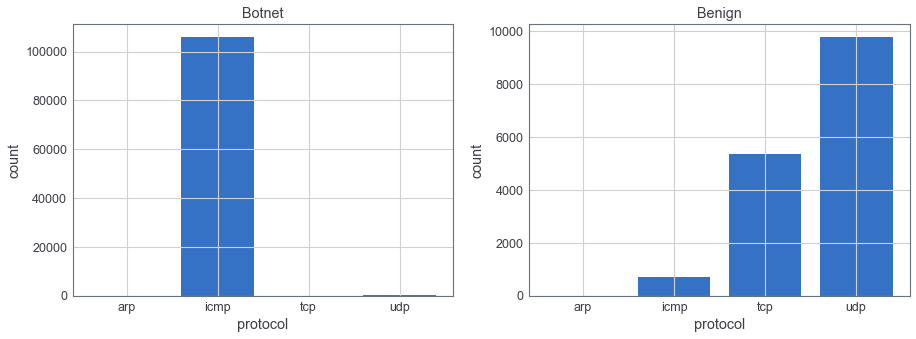

In [8]:
protocol_1 = np.unique(source10_botnet['Proto'], return_counts=True)[1]
protocol_1 = np.insert(protocol_1, 0, 0)
protocol_0 = np.unique(source10_benign['Proto'], return_counts=True)[1]
print("Figure 1: The distribution of Botnet and Benign Cases in Protocol\n")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(['arp', 'icmp', 'tcp', 'udp'], [height for height in protocol_1])
plt.xlabel('protocol')
plt.ylabel('count')
plt.title("Botnet")
plt.subplot(1,2,2)
plt.bar(['arp', 'icmp', 'tcp', 'udp'], [height for height in protocol_0])
plt.xlabel('protocol')
plt.ylabel('count')
plt.title('Benign')
plt.show()

In [9]:
# encode protocol
protocol_encoder = {'arp': 0, 'udp': 1, 'tcp': 2, 'icmp': 3}
source10["Proto"].replace('arp', protocol_encoder['arp'], inplace=True)
source10["Proto"].replace('udp', protocol_encoder['udp'], inplace=True)
source10["Proto"].replace('tcp', protocol_encoder['tcp'], inplace=True)
source10["Proto"].replace('icmp', protocol_encoder['icmp'], inplace=True)

#### Selected Feature 2: Duration

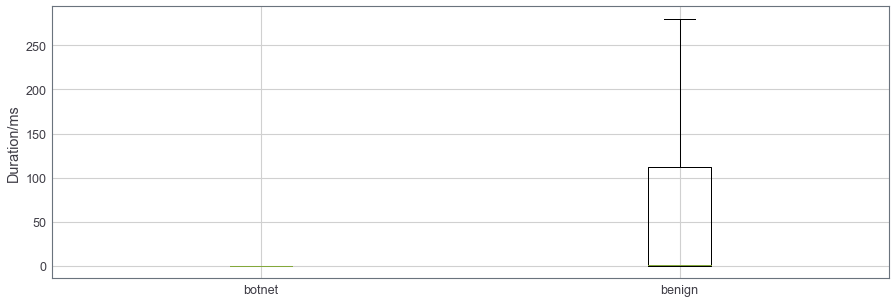

Figure 2: The distribution of Botnet and Benign Cases in Duration

-botnet 
 mean: 90.82559153096368 std: 292.01502420114736

-benign 
 mean: 46.585669888622334 std: 301.2336573129555


In [10]:
plt.figure(figsize=(15, 5))
plt.boxplot(
    [source10_botnet["Dur"].values * 1e3, source10_benign["Dur"].values * 1e3],
    showfliers=False,
    labels=['botnet', 'benign'])
plt.ylabel("Duration/ms")
plt.show()

print("Figure 2: The distribution of Botnet and Benign Cases in Duration\n")
print("-botnet \n", "mean:", source10_botnet["Dur"].mean(), "std:",
      source10_botnet["Dur"].std())
print()
print("-benign \n", "mean:", source10_benign["Dur"].mean(), "std:",
      source10_benign["Dur"].std())

#### Combine to One

In [11]:
from sklearn.preprocessing import Normalizer, KBinsDiscretizer
from sklearn.decomposition import PCA
from scipy.stats import spearmanr

In [12]:
features = source10[['Dur', 'Proto']]
features.head()

,Dur,Proto
532,3587.569824,2
822,198.072739,2
842,197.928329,2
1021,0.000399,1
1022,0.000400,1


In [13]:
# normalization
norm = Normalizer().fit(features)
features_norm = norm.transform(features)

# pca conversion
pca = PCA(n_components=1)
feature_comb = pca.fit_transform(features_norm, y=source10['Botnet'].values).reshape(-1,1)

In [14]:
# select the best number of bins
spearman = []
for i in range(2,100):
    KBins = KBinsDiscretizer(n_bins=i, encode='ordinal', strategy='quantile')
    feature_disc = KBins.fit_transform(feature_comb)
    spearman.append(spearmanr(feature_disc, feature_comb)[0])

Figure 3: The relationship between number of bins and spearmanr relation



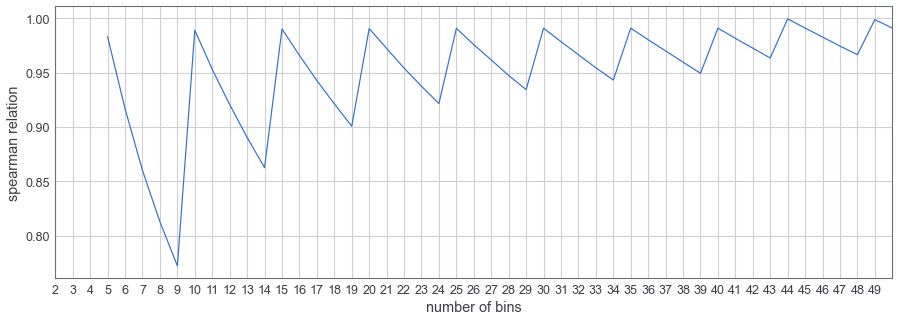

In [15]:
print("Figure 3: The relationship between number of bins and spearmanr relation\n")
plt.figure(figsize=(15,5))
plt.plot(np.arange(2,100), spearman)
plt.xlim([2,50])
plt.xticks(np.arange(2,50))
plt.xlabel("number of bins")
plt.ylabel("spearman relation")
plt.show()

In [16]:
# use kbins to discretize two features
feature_disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile').fit_transform(feature_comb)

source10['feature'] = feature_disc
source10.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Botnet,feature
532,2011/08/18 10:19:15.693956,3587.569824,2,147.32.84.164,54784,<?>,74.125.232.215,443,PA_PA,0.0,0.0,3049,978731,245317,flow=From-Normal-V51-Grill,False,2.0
822,2011/08/18 10:19:18.143576,198.072739,2,147.32.84.164,56165,<?>,74.125.232.197,80,FA_FA,0.0,0.0,14,924,462,flow=From-Normal-V51-Grill,False,2.0
842,2011/08/18 10:19:18.303590,197.928329,2,147.32.84.164,57965,<?>,209.85.149.138,80,FA_FA,0.0,0.0,14,924,462,flow=From-Normal-V51-Grill,False,2.0
1021,2011/08/18 10:19:19.838272,0.000399,1,147.32.84.170,45807,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V51-Stribrek,False,1.0
1022,2011/08/18 10:19:19.839123,0.000400,1,147.32.84.170,35380,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V51-Stribrek,False,1.0


Figure 4: The distribution of Botnet and Benign Cases in the New Combine Feature



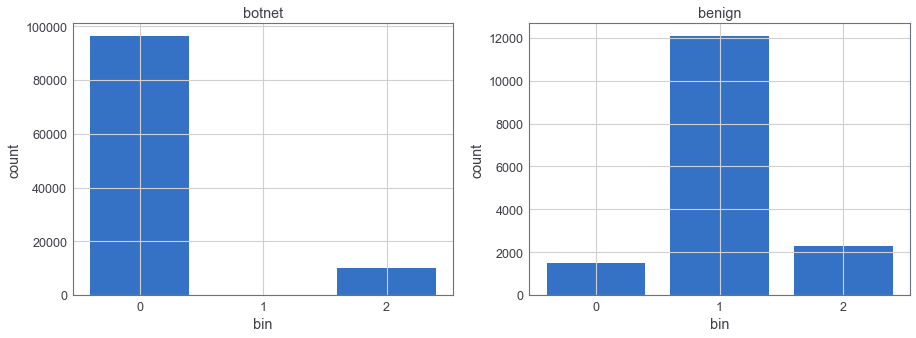

In [17]:
source10_botnet = source10[source10['Botnet'] == 1]
source10_benign = source10[source10['Botnet'] != 1]

botnet_result = np.unique(source10_botnet.feature.values, return_counts=True)
benign_result = np.unique(source10_benign.feature.values, return_counts=True)
print("Figure 4: The distribution of Botnet and Benign Cases in the New Combine Feature\n")
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.bar(botnet_result[0], botnet_result[1])
plt.xticks(botnet_result[0])
plt.xlabel("bin")
plt.ylabel("count")
plt.title("botnet")
plt.subplot(122)
plt.bar(benign_result[0], benign_result[1])
plt.xticks(benign_result[0])
plt.xlabel("bin")
plt.ylabel("count")
plt.title("benign")
plt.show()

### 1b. Answers and explanation

In discretization task we combine the protocol and duration into one feature. As shown in figure1 and 2, their performances are quite different in botnet and benign data. The histogram shows that protocol of botnet cases are mainly ICMP while the protocol in benign cases are always TCP and UDP. The box-plot proves that the botnet cases always have shorter duration. 

To better combine two features into one, we implemented the PCA that we learnt in Lab2. To select the best bins, we plot the relationship between number of bins and the spearmanr correlation coefficient. As the number of bins also relates to the following tasks, the larger bins, the more 3-gram combination. We choose the smallest bins that can reach the highest spearmanr in its neighbours. For example, for dataset 10, we choose 10 bins.

From figure4, We can thus clearly see the effect on discretization, which can easily and quite fast be implemented to be used for infection detection. In the combined feature, the majority of botnet cases are 0 while the benign cases mainly are 1. It proves the validity of our discretization, which can distinguish these two types of flows. 


## 2. Frequent task – 1/2 A4 (Individual)

### 2a. Use the SPACE SAVING algorithm

#### load raw data

In [18]:
# Function to discretize data
def discretization(df: pd.DataFrame, quantile=10, plot=False, sel=10):
    df = df[~df.Label.str.contains("Background")]

    if sel in [9, 10]:
        Botnet = [
            "147.32.84.165", "147.32.84.191", "147.32.84.192", "147.32.84.193",
            "147.32.84.204", "147.32.84.205", "147.32.84.206", "147.32.84.207",
            "147.32.84.208", "147.32.84.209"
        ]
    elif sel in [11, 12]:
        Botnet = ['147.32.84.165', '147.32.84.191', '147.32.84.192']
    df['Botnet'] = df['SrcAddr'].isin(Botnet)

    protocol_encoder = {'arp': 0, 'udp': 1, 'tcp': 2, 'icmp': 3, 'rtp': 4}
    df["Proto"].replace('arp', protocol_encoder['arp'], inplace=True)
    df["Proto"].replace('udp', protocol_encoder['udp'], inplace=True)
    df["Proto"].replace('tcp', protocol_encoder['tcp'], inplace=True)
    df["Proto"].replace('icmp', protocol_encoder['icmp'], inplace=True)
    df["Proto"].replace('rtp', protocol_encoder['rtp'], inplace=True)

    features = df[['Dur', 'Proto']]
    features_norm = Normalizer().fit_transform(features)
    pca = PCA(n_components=1)
    feature_comb = pca.fit_transform(features_norm,
                                     y=df['Botnet'].values).reshape(-1, 1)

    spearman = []
    for i in range(2, 50):
        KBins = KBinsDiscretizer(n_bins=i,
                                 encode='ordinal',
                                 strategy='quantile')
        feature_disc = KBins.fit_transform(feature_comb)
        spearman.append(spearmanr(feature_disc, feature_comb)[0])
    plt.figure(figsize=(15, 5))
    plt.plot(np.arange(2, 50), spearman)
    plt.xticks(np.arange(2, 50))
    plt.xlabel("number of bins")
    plt.ylabel("spearman relation")
    plt.show()

    feature_disc = KBinsDiscretizer(
        n_bins=quantile, encode='ordinal',
        strategy='quantile').fit_transform(feature_comb)
    df['feature'] = feature_disc

    if (plot):
        df_botnet = df[df['Botnet'] == 1]
        df_benign = df[df['Botnet'] != 1]

        botnet_result = np.unique(df_botnet.feature.values, return_counts=True)
        benign_result = np.unique(df_benign.feature.values, return_counts=True)

        plt.figure(figsize=(15, 5))
        plt.subplot(121)
        plt.bar(botnet_result[0], botnet_result[1])
        plt.xticks(botnet_result[0])
        plt.xlabel("bin")
        plt.ylabel("count")
        plt.title("botnet")
        plt.subplot(122)
        plt.bar(benign_result[0], benign_result[1])
        plt.xticks(benign_result[0])
        plt.xlabel("bin")
        plt.ylabel("count")
        plt.title("benign")
        plt.show()

    return df

Figure 5: CTU-13 scenarios 10



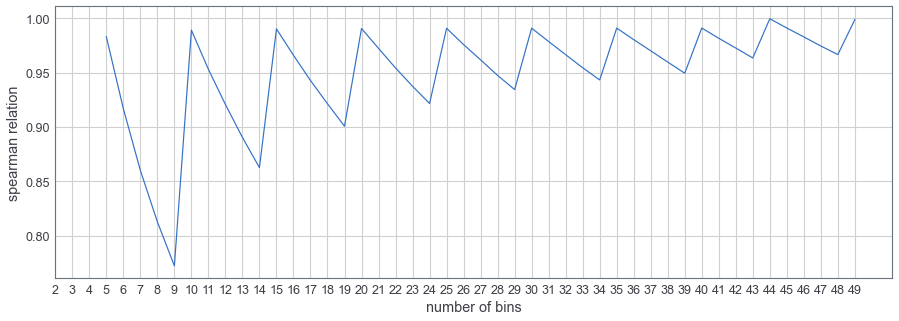

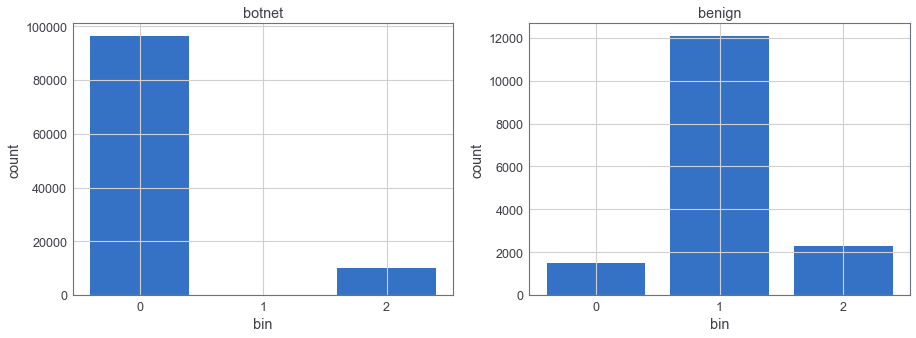

In [19]:
# load the raw data from file
raw_source10 = pd.read_csv('./dataset/dataset_10/capture20110818.binetflow')
# preprocessing
print("Figure 5: CTU-13 scenarios 10\n")
source10 = discretization(raw_source10, quantile=10, plot=True, sel=10)

#### load the discretized data

In [20]:
# load discretized data and extract features
all_data = source10['feature'].astype(int).astype(str)
# separate benign and botnet data
benign_data = source10[source10['Botnet']!= True]
input_benign = benign_data['feature'].astype(int).astype(str)

botnet_data = source10[source10['Botnet']== True]
input_botnet = botnet_data['feature'].astype(int).astype(str)
# convert features into list
input_botnet = input_botnet.to_list()
input_benign = input_benign.to_list()
input_all = all_data.to_list()

#### define the functions to find the top10 features in botnet and benign dataset

In [21]:
# top k elements found by spacesaving
def SpaceSavingCounting(input_stream, k):
    '''
    input_stream: input string data
    k: top k frequent elements
    Returns a dictionary <char,count>
    '''
    ss_counters = {} # dictionary for 3-gram and its amount
    ngram_input = [] # list for converting the input stream into 3-gram
    n_gram = 3 # N gram

    for i in range(0, len(input_stream) - n_gram + 1):
        ngram_input.append("".join(input_stream[i:i + n_gram]))
#     print(ngram_input)
    for char in ngram_input:
        if char in ss_counters:
            # element existed: increment the counter by 1 if this element exists
            ss_counters[char] += 1
        else:
            if len(ss_counters) + 1 > k:  # the counter overflow
                # get the counter with least number
                min_counter = min(ss_counters, key=ss_counters.get)
                # increase on the original number
                ss_counters[char] = ss_counters.pop(min_counter) + 1
            else:
                ss_counters[char] = 1  # new element
                # Sort the frequency in descending order
    ss_sorted_counters = {k: v for k, v in sorted(
        ss_counters.items(), key=lambda item: item[1], reverse=True)}
    i = 0
    result_ss = {} # return the top 10 elements
    for k,v in ss_sorted_counters.items():
        i +=1
        if(i<=10):
            result_ss[k] = v
    return ss_sorted_counters, result_ss

In [22]:
# actual dictionary
def ActualCounting(input_stream,knum):
    '''
    input_stream: input string data
    Returns a dictionary <char,count>
    k:top k elements
    '''
    n_gram = 3
    ngram_input = []
    top_elements = {}
    counter = 0
#     for i in data:
#         input_stream += str(data)

    for i in range(0, len(input_stream) - n_gram + 1):
        ngram_input.append("".join(input_stream[i:i + n_gram]))

    actual_counters = {}

    for char in ngram_input:
        if char in actual_counters:
            actual_counters[char] += 1
        else:
            actual_counters[char] = 1

    # Sort the frequency in descending order
    sorted_counter = {k: v for k, v in sorted(
        actual_counters.items(), key=lambda item: item[1], reverse=True)}
    for k, v in sorted_counter.items():
        if counter < knum:
            top_elements[k] = v
        counter += 1
    i = 0
    result_actual = {}# return the top 10 elements
    for k,v in top_elements.items():
        i +=1
        if(i<=10):
            result_actual[k] = v
    return top_elements, result_actual

In [23]:
def compare_ss_actual(input_data, knum):
    '''
    input_data: the input dataframe
    knum: the number of counters to compare the features found by space saving and actual
    '''
    knum_ss = {}
    knum_acutal ={}
    knum_ss, ss_10 = SpaceSavingCounting(input_data, knum)
    knum_actual, actual_10 = ActualCounting(input_data, knum)
    # get the result in the dataframe which can be returned
    df_result = pd.DataFrame(list(zip(ss_10.keys(),ss_10.values(),actual_10.keys(),actual_10.values())), 
                             columns=['Spacesaving_top10_3grams','Spacesaving_amount','Actual_top10_3grams','Actual_amount'])
    # the number of the same features in the spacesaving and actual dictionary
    same_key = 0
    # the list to store the accuracy of each same feature : the amount of this feature found by space saving/ the actual amount of the feature
    accuracy_list = []
    for k in ss_10.keys():
        if k in actual_10.keys():
            same_key += 1
            accuracy_list.append(float(ss_10[k]/actual_10[k]))
            print("The approximation of " + str(k) + " is: " +
                  str(float(ss_10[k]/actual_10[k])))
    print("Benign Data set: The total same keys in SpaceSaving and Actual is " + str(same_key))
    return df_result, accuracy_list, same_key

#### Space Saving result and accuracy - number of counters

In [24]:
element_num = np.arange(10,25,1)
# the list to save accuracy for each number of counters
accuracy_results = []
# the list to save number of the same features for each number of counters
same_keynums = []
for i in element_num:
    df_result = pd.DataFrame
    same_keynum = 0
    accuracy_result = []
    print("\n The accuracy of " + str(i) + " counters is shown below:\n")
    df_result, accuracy_result, same_keynum = compare_ss_actual(input_all,i)
    same_keynums.append(same_keynum)
    accuracy_results.append(np.mean(accuracy_result))


 The accuracy of 10 counters is shown below:

The approximation of 000 is: 1.0014128355484428
The approximation of 111 is: 1.0
The approximation of 020 is: 1.016730697732061
The approximation of 200 is: 1.0161510746676605
The approximation of 002 is: 1.0164322171044442
The approximation of 202 is: 1.9668571428571429
The approximation of 220 is: 1.9752941176470589
Benign Data set: The total same keys in SpaceSaving and Actual is 7

 The accuracy of 11 counters is shown below:

The approximation of 000 is: 1.0010877583426063
The approximation of 111 is: 1.0
The approximation of 020 is: 1.012764902714091
The approximation of 200 is: 1.0121754255186979
The approximation of 002 is: 1.0124486493215485
The approximation of 202 is: 1.7108571428571429
The approximation of 220 is: 1.7105882352941177
Benign Data set: The total same keys in SpaceSaving and Actual is 7

 The accuracy of 12 counters is shown below:

The approximation of 000 is: 1.0008502019229566
The approximation of 111 is: 1.0
Th

Figure6 : The relationship between accuracy and number of counters

Accuracy: The average ratio of the amount of the same feature found by Space Saving and Actual


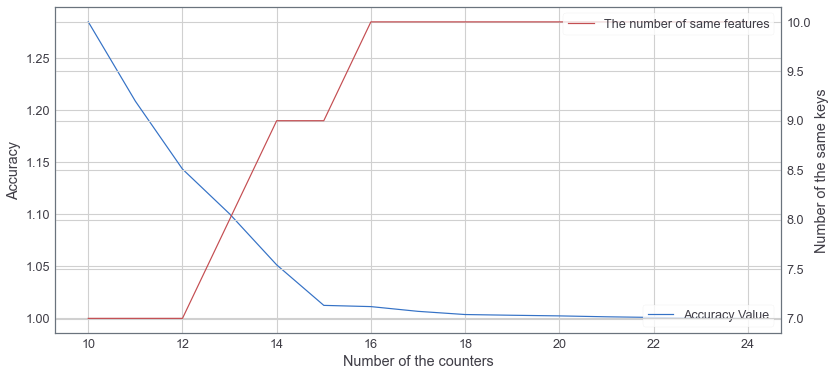

In [25]:
print("Figure6 : The relationship between accuracy and number of counters\n")
print("Accuracy: The average ratio of the amount of the same feature found by Space Saving and Actual")
fig = plt.figure(figsize = (13,6))

ax1 = fig.add_subplot(111)
ax1.plot(element_num,accuracy_results,label='Accuracy Value')
plt.xlabel('Number of the counters')  
ax1.set_ylabel("Accuracy")
plt.legend(loc=4)

ax2 = ax1.twinx()  # this is the important function
ax2.plot(element_num,same_keynums, 'r',label='The number of same features')
ax2.set_ylabel('Number of the same keys')
plt.legend(loc=1)

plt.show()

#### Compare the space saving applied in benign and botnet data

In [26]:
#benign 
benign_num = np.arange(10,25,1)
benign_accuracy_results = []
benign_same_keynums = []
for i in benign_num:
    df_benign_result = pd.DataFrame
    benign_same_keynum = 0
    benign_accuracy_result = []
    print("\n The accuracy of " + str(i) + " counters is shown below:\n")
    df_benign_result, benign_accuracy_result, benign_same_keynum = compare_ss_actual(input_benign,i)
    benign_same_keynums.append(benign_same_keynum)
    benign_accuracy_results.append(np.mean(benign_accuracy_result))


 The accuracy of 10 counters is shown below:

The approximation of 111 is: 1.0
The approximation of 211 is: 1.0
The approximation of 112 is: 1.0
The approximation of 000 is: 1.169467787114846
The approximation of 222 is: 1.0
The approximation of 121 is: 1.0
The approximation of 011 is: 1.6612466124661247
The approximation of 110 is: 1.6495956873315365
The approximation of 221 is: 1.9645161290322581
Benign Data set: The total same keys in SpaceSaving and Actual is 9

 The accuracy of 11 counters is shown below:

The approximation of 111 is: 1.0
The approximation of 211 is: 1.0
The approximation of 112 is: 1.0
The approximation of 222 is: 1.0
The approximation of 000 is: 1.1288515406162465
The approximation of 121 is: 1.0
The approximation of 011 is: 1.3468834688346885
The approximation of 110 is: 1.3369272237196765
The approximation of 122 is: 1.555205047318612
Benign Data set: The total same keys in SpaceSaving and Actual is 9

 The accuracy of 12 counters is shown below:

The approxi

Figure7 : The relationship between accuracy and number of counters in benign data

Accuracy: The average ratio of the amount of the same feature found by Space Saving and Actual


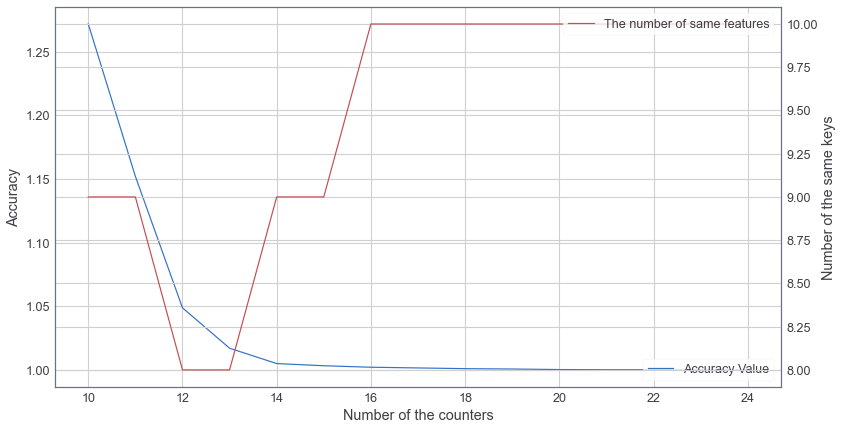

In [27]:
print("Figure7 : The relationship between accuracy and number of counters in benign data\n")
print("Accuracy: The average ratio of the amount of the same feature found by Space Saving and Actual")
fig = plt.figure(figsize = (13,7))

ax1 = fig.add_subplot(111)
ax1.plot(benign_num,benign_accuracy_results,label='Accuracy Value')
plt.xlabel('Number of the counters')  
ax1.set_ylabel("Accuracy")
plt.legend(loc=4)

ax2 = ax1.twinx()  # this is the important function
ax2.plot(benign_num,benign_same_keynums, 'r',label='The number of same features')
ax2.set_ylabel('Number of the same keys')
plt.legend(loc=1)

plt.show()

In [28]:
#botnet
botnet_num = np.arange(10,25,1)
botnet_accuracy_results = []
botnet_same_keynums = []
for i in botnet_num:
    df_botnet_result = pd.DataFrame
    botnet_same_keynum = 0
    botnet_accuracy_result = []
    print("\n The accuracy of " + str(i) + " counters is shown below:\n")
    df_botnet_result, botnet_accuracy_result, botnet_same_keynum = compare_ss_actual(input_botnet,i)
    botnet_same_keynums.append(botnet_same_keynum)
    botnet_accuracy_results.append(np.mean(botnet_accuracy_result))


 The accuracy of 10 counters is shown below:

The approximation of 000 is: 1.0000755943606607
The approximation of 020 is: 1.0009940357852882
The approximation of 200 is: 1.0004998750312422
The approximation of 002 is: 1.0005000625078135
The approximation of 202 is: 1.0162412993039442
The approximation of 220 is: 1.011056511056511
The approximation of 022 is: 1.01230012300123
The approximation of 222 is: 1.0056497175141244
The approximation of 121 is: 1.7049180327868851
Benign Data set: The total same keys in SpaceSaving and Actual is 9

 The accuracy of 11 counters is shown below:

The approximation of 000 is: 1.0000503962404406
The approximation of 020 is: 1.0006212723658052
The approximation of 200 is: 1.0003749062734317
The approximation of 002 is: 1.00037504688086
The approximation of 202 is: 1.013921113689095
The approximation of 022 is: 1.0086100861008611
The approximation of 220 is: 1.0073710073710074
The approximation of 222 is: 1.0
The approximation of 121 is: 1.229508196721

Figure8 : The relationship between accuracy and number of counters in botnet data

Accuracy: The average ratio of the amount of the same feature found by Space Saving and Actual


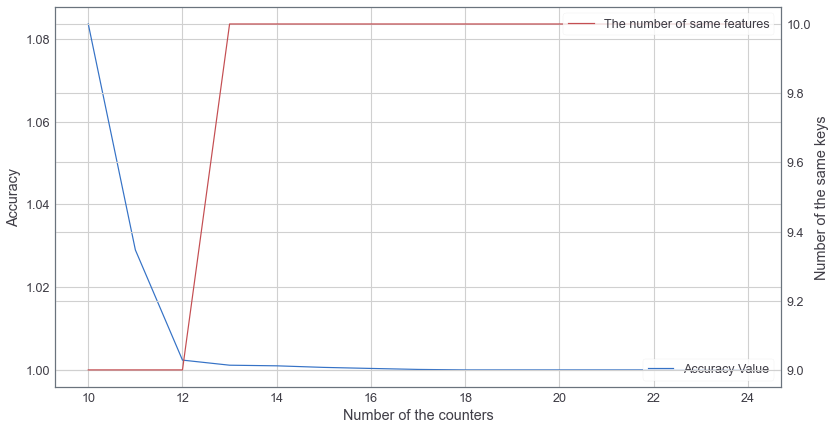

In [29]:
print("Figure8 : The relationship between accuracy and number of counters in botnet data\n")
print("Accuracy: The average ratio of the amount of the same feature found by Space Saving and Actual")
fig = plt.figure(figsize = (13,7))

ax1 = fig.add_subplot(111)
ax1.plot(botnet_num,botnet_accuracy_results,label='Accuracy Value')
ax1.set_ylabel("Accuracy")
plt.xlabel('Number of the counters')  
plt.legend(loc=4)

ax2 = ax1.twinx()  # this is the important function
ax2.plot(botnet_num,botnet_same_keynums, 'r',label='The number of same features')
ax2.set_ylabel('Number of the same keys')
plt.legend(loc=1)

plt.show()

### 2b. Analysis and answers to the questions

According to the figures above, we can see that:

For all data including botnet and benign cases, the result in figure1 shows that:

1) The amount of the same feature found by the Space Saving exceeds the actual amount, resulting in an accuracy larger than 1.

2) With the number of counters increment, the number of the same feature and the accuracy are getting better. In other words, the more counters, the better the result. 

3) The turning points of the number of the same features and accuracy are different. When the number of counters reaches 16, Space Saving could find out all top 10 features as the actual result. But the average accuracy keeps getting closer to the perfect value(1). 

4) By separating the benign and botnet data in the dataset, we can see that performance of the non-infected data set and the infected data are slightly different. From both perspectives of the number of the same features in the top 10 frequent elements and accuracy - the amount of the same feature found by Space Saving, non-infected data has a worse result. The reason could be that this data set is more varied. These results could be concluded that the SpaceSaving algorithm is a good method to approximate the most frequent elements. 

5) The approximation errors could be explained using the mathematical theory as mentioned in the slides - "Any item x whose true count > m/k is stored" where m is the sum of the counters and k the number of counters. Approximation errors could occur when, for example, the last item in the stream only occurs once. In this case, the last n-gram replaces the counter with the lowest minimum value. However, this n-gram only occurred one time while the value with the minimum counter value could be way higher. The approximation is upper bounded by m/k, making Space Saving an execellent approximating distributions of data with limited memory.

## 3. Sketching task – 1/2 A4 (Individual)

### 3a. COUNT-MIN sketch


In [30]:
from tqdm import tqdm
from hashlib import md5

In [31]:
height = 0
width = 0
hashTable = np.zeros([height, width]).astype(np.int64)

# initialize a hash table
def initHashTable(h, w):
    global height
    global width
    global hashTable

    height = h
    width = w
    hashTable = np.zeros([height, width])


# map the value to hash table
def addToHash(value):
    global width
    global height
    global hashTable
    
    for i in range(height):
        hashTable[i, int(md5(bytes(value * (2*i+1), encoding='utf8')).hexdigest(),16) % width] += 1

# retrive the width positions in the table
def retriveHash(value):
    global width
    global height

    return [(int(md5(bytes(value * (2*i+1), encoding='utf8')).hexdigest(),16) % width) for i in range(height)]


# count min
def count_min(value):
    global hashTable
    global height

    return np.min(hashTable[np.arange(height),
                            retriveHash(value)]).astype(np.int)


# clearHashTable
def clearHashTable():
    global hashTable

    hashTable = np.zeros([height, width])


# string concatenation
def concatenate(arr: np.array):
    string = ''
    for sub in arr:
        string += sub
    return string

In [32]:
# load the stream to memory
cm_stream = source10.feature.values.astype(np.int16).astype(np.str)

print("the first 10 values:", cm_stream[:10])

the first 10 values: ['2' '2' '2' '1' '1' '1' '2' '2' '2' '2']


In [33]:
# initialize actual count
dict_name = []
for i in ['0', '1', '2']:
    for j in ['0', '1', '2']:
        for k in ['0', '1', '2']:
            dict_name.append(i+j+k)
initial_value = np.zeros(3**3).astype(np.int32)
actual_count = dict(zip(dict_name, initial_value))

for i in range(len(cm_stream)-2):
    temp = concatenate(cm_stream[i:i+3])
    actual_count[temp] += 1
actual_top10 = sorted(actual_count.items(), key=lambda x:x[1], reverse=True)[:10]

err_top10 = []
height_width = []
for h in tqdm(range(1, 10)):
    for w in range(1,10):
        height_width.append([h,w])
        # initialize count-min sketching matrix
        initHashTable(h, w) # for different combination of width and height

        # counting
        for i in range(len(cm_stream)-2):
            temp = concatenate(cm_stream[i:i+3])
#             actual_count[temp] += 1
            addToHash(temp)

        temp = []
        for name_ in dict_name:
            temp.append(count_min(name_))
        cm_count = dict(zip(dict_name, temp))

        # compare
#         actual_top10 = sorted(actual_count.items(), key=lambda x:x[1], reverse=True)[:10]
        cm_top10 = sorted(cm_count.items(), key=lambda x:x[1], reverse=True)[:10]
        err_top10.append(np.sum(np.abs([actual_top10[i][1] - cm_top10[i][1] for i in range(10)])))

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [02:30<00:00, 16.71s/it]


In [34]:
for i in range(len(height_width)):
    print(height_width[i], err_top10[i])
print()
best_height_width = height_width[np.argmin(err_top10)]
print("best height and width:", best_height_width)

[1, 1] 1104052
[1, 2] 970562
[1, 3] 797462
[1, 4] 354820
[1, 5] 804982
[1, 6] 643024
[1, 7] 497468
[1, 8] 119402
[1, 9] 214361
[2, 1] 1104052
[2, 2] 732518
[2, 3] 297082
[2, 4] 118016
[2, 5] 138043
[2, 6] 138735
[2, 7] 62972
[2, 8] 39396
[2, 9] 46252
[3, 1] 1104052
[3, 2] 478205
[3, 3] 193307
[3, 4] 93215
[3, 5] 58790
[3, 6] 128911
[3, 7] 43345
[3, 8] 15649
[3, 9] 21824
[4, 1] 1104052
[4, 2] 325592
[4, 3] 167616
[4, 4] 77657
[4, 5] 56759
[4, 6] 114953
[4, 7] 20331
[4, 8] 15126
[4, 9] 12494
[5, 1] 1104052
[5, 2] 232374
[5, 3] 165441
[5, 4] 75202
[5, 5] 52595
[5, 6] 28029
[5, 7] 13491
[5, 8] 7158
[5, 9] 4874
[6, 1] 1104052
[6, 2] 107595
[6, 3] 163355
[6, 4] 56580
[6, 5] 34061
[6, 6] 20608
[6, 7] 9215
[6, 8] 5366
[6, 9] 4688
[7, 1] 1104052
[7, 2] 107595
[7, 3] 75343
[7, 4] 48761
[7, 5] 26493
[7, 6] 18003
[7, 7] 8330
[7, 8] 3933
[7, 9] 2390
[8, 1] 1104052
[8, 2] 99485
[8, 3] 66841
[8, 4] 18021
[8, 5] 24232
[8, 6] 10003
[8, 7] 6837
[8, 8] 2727
[8, 9] 2134
[9, 1] 1104052
[9, 2] 99404
[9, 3] 

In [35]:
# example when height = 9 and width = 8, total error = 1359

initHashTable(9, 8)
# counting
for i in range(len(cm_stream) - 2):
    temp = concatenate(cm_stream[i:i + 3])
    addToHash(temp)

temp = []
for name_ in dict_name:
    temp.append(count_min(name_))
cm_count = dict(zip(dict_name, temp))

# compare
cm_top10 = sorted(cm_count.items(), key=lambda x: x[1], reverse=True)[:10]
err_top10 = np.abs([actual_top10[i][1] - cm_top10[i][1] for i in range(10)])
result = pd.DataFrame(
    np.array([[actual_top10[i][0] for i in range(10)],
              [actual_top10[i][1] for i in range(10)],
              [cm_top10[i][1] for i in range(10)], err_top10]).T, columns=['3-grams', 'actual', 'cm', 'error'])

In [36]:
result

,3-grams,actual,cm,error
0,000,79981,79981,0
1,111,9166,9166,0
2,020,8069,8668,599
3,200,8049,8431,382
4,002,8033,8358,325
5,222,968,1310,342
6,211,964,1303,339
7,112,963,1194,231
8,202,875,1117,242
9,220,850,983,133


### 3b. Analysis and answers to the questions

## 4. Min-wise locality sensitive hashing task – 1/2 A4 (Individual)

### 4a. Implementation

#### get minimum hash matrix

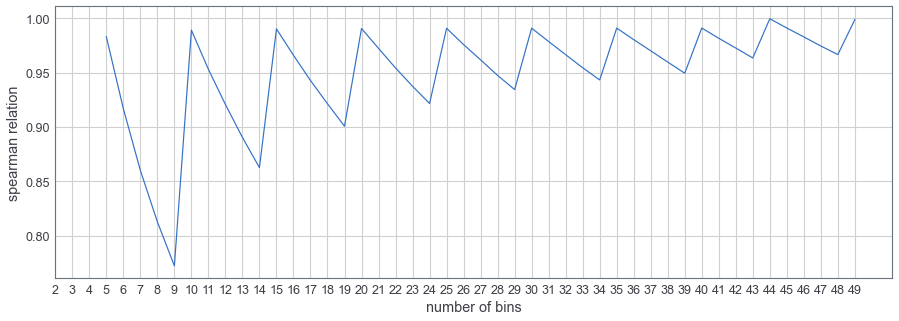

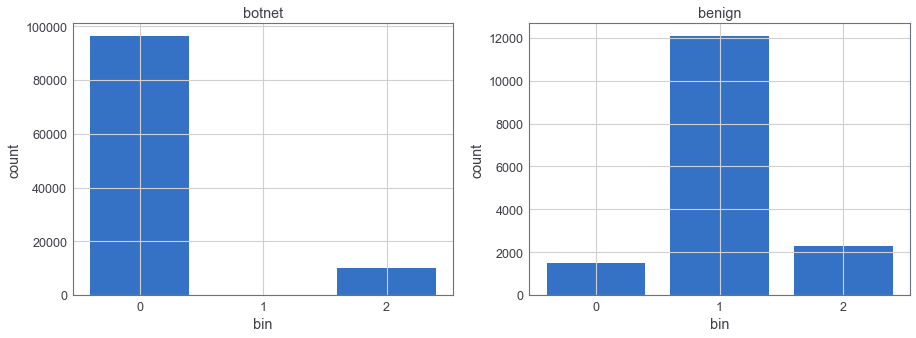

In [37]:
# load the raw data from file
raw_source10 = pd.read_csv('./dataset/dataset_10/capture20110818.binetflow')
# preprocessing
source10 = discretization(raw_source10, quantile=10, plot=True, sel=10)
ori_data = source10.copy()
# separate benign and botnet data
benign_data = source10[source10['Botnet']!= True]
botnet_data = source10[source10['Botnet']== True]

In [38]:
# function for get the 3-gram dictionary according to the source address and destination address
def get_3gram_dict(data):
    '''
    data: input data for get 3-gram
    return: ippair_list - the pair of ip source address and destination address
    ippair_feature: the 3-gram feature
    '''
    index_matrix = data[["SrcAddr", "DstAddr", "feature"]
                        ].groupby(["SrcAddr", "DstAddr"])
    dict_2 = index_matrix.groups
    dict_3 = {}  # dict without values <3 -> for 3-gram
    for k, v in dict_2.items():
        temp = []
        if len(v) >= 3:
            for value in v:
                temp.append(str(int(ori_data.loc[value, ['feature']])))
            dict_3[k] = temp

    # get 3-gram for each ip combination
    n_gram = 3
    dict_4 = {} # key:ip combination value:3-gram features
    for k,v in dict_3.items():
        temp2 = []
        temp3 = []
        if(len(v)>=3):
            for i in range(0, len(v)-n_gram +1):
                temp2.append("".join(v[i:i+n_gram]))
            dict_4[k] = temp2
        else:
            temp3.append("".join(v))
            dict_4[k]= temp3
    # convert the keys-tuple to list for further putting into dataframe
    ippair_tuple = dict_4.keys()
    ippair_feature = {}
    ippair_list = []
    for k,v in dict_4.items():
        ippair_list.append(k[0]+','+k[1])
        ippair_feature[k[0]+','+k[1]] = v
    return ippair_list,ippair_feature

In [39]:
# function for get permutation of feature
def get_permutations(input_string, repeat_times):
    '''
    input string: the string for permutation
    repeat times: the length of n-gram
    '''
    feature_permutation = []
    for i in itertools.product(input_string, repeat = repeat_times):
        feature_permutation.append((''.join(i)))
    return feature_permutation
res = get_permutations('012',3)
print(res)

['000', '001', '002', '010', '011', '012', '020', '021', '022', '100', '101', '102', '110', '111', '112', '120', '121', '122', '200', '201', '202', '210', '211', '212', '220', '221', '222']


In [40]:
# the function for convert the ippair-3gram-feature to minhash matrix
def get_minhash(data):
    permutations = get_permutations('012',3)
    ippair_list, ippair_feature = get_3gram_dict(data)
    df_minhash = pd.DataFrame(columns=permutations,index=ippair_list)
    for k in ippair_feature.keys():
        for value in ippair_feature[k]:
            if value in df_minhash.columns:
                df_minhash.loc[k,value] = 1
    df_minhash = df_minhash.fillna(0)
    # save the ippair minhash matrix to save running time
    df_minhash.to_csv('./dataset/ippair_minhash_matrix.csv')
    print(df_minhash)
    return df_minhash

In [41]:
# getting minhash matrix takes about 2 minutes, you can load data from the ippair_minhash_matrix.csv
get_minhash(ori_data)

                            000  001  002  010  011  012  020  021  022  100  \
147.32.1.20,147.32.85.7       1    0    0    0    0    0    0    0    0    0   
147.32.1.20,147.32.86.168     1    0    0    0    0    0    0    0    0    0   
147.32.80.9,147.32.84.118     1    0    0    0    0    0    0    0    0    0   
147.32.80.9,147.32.84.137     1    0    0    0    0    0    0    0    0    0   
147.32.80.9,147.32.84.138     1    0    0    0    0    0    0    0    0    0   
...                         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
147.32.87.36,147.32.86.77     1    0    0    0    0    0    0    0    0    0   
147.32.87.36,147.32.87.1      0    0    0    0    0    0    0    0    0    0   
147.32.87.36,147.32.87.33     0    0    0    0    0    0    0    0    0    0   
147.32.87.36,66.249.66.211    0    0    0    0    0    0    0    1    0    0   
147.32.87.36,66.249.72.228    0    0    0    0    0    0    0    0    0    0   

                            ...  122  2

,000,001,002,010,011,012,020,021,022,100,...,122,200,201,202,210,211,212,220,221,222
"147.32.1.20,147.32.85.7",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"147.32.1.20,147.32.86.168",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"147.32.80.9,147.32.84.118",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"147.32.80.9,147.32.84.137",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"147.32.80.9,147.32.84.138",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"147.32.87.36,147.32.86.77",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"147.32.87.36,147.32.87.1",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"147.32.87.36,147.32.87.33",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"147.32.87.36,66.249.66.211",0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


#### transpose matrix

In [42]:
minhash_matrix = pd.read_csv('./dataset/ippair_minhash_matrix.csv')
minhash_matrix.head()

,Unnamed: 0,000,001,002,010,011,012,020,021,022,...,122,200,201,202,210,211,212,220,221,222
0,"147.32.1.20,147.32.85.7",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"147.32.1.20,147.32.86.168",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"147.32.80.9,147.32.84.118",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"147.32.80.9,147.32.84.137",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"147.32.80.9,147.32.84.138",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# transpose matrix
# row: 27 combinations for feature
# coloum: the ippair address
minhash_T = minhash_matrix.T
minhash_T

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
Unnamed: 0,"147.32.1.20,147.32.85.7","147.32.1.20,147.32.86.168","147.32.80.9,147.32.84.118","147.32.80.9,147.32.84.137","147.32.80.9,147.32.84.138","147.32.80.9,147.32.84.184","147.32.80.9,147.32.84.25","147.32.80.9,147.32.84.59","147.32.80.9,147.32.84.68","147.32.80.9,147.32.84.94",...,"147.32.87.11,147.32.87.1","147.32.87.212,82.208.56.89","147.32.87.36,147.32.80.13","147.32.87.36,147.32.80.9","147.32.87.36,147.32.86.6","147.32.87.36,147.32.86.77","147.32.87.36,147.32.87.1","147.32.87.36,147.32.87.33","147.32.87.36,66.249.66.211","147.32.87.36,66.249.72.228"
000,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,0,0,0,0
001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### calculate the jaccard similarity on min hash matrix

In [44]:
# the function for calculate jaccard distance
def jaccard_sim(perm, profile):
    '''
    perm: the permutation for calculating jaccard distance
    profile: the input matrix for calculating
    '''
    jacc = []
    for p in tqdm(perm):
        p1 = np.asarray(profile[:, p[0]], np.bool)
        p2 = np.asarray(profile[:, p[1]], np.bool)
        j = np.double(np.bitwise_and(p1, p2).sum()) / np.double(np.bitwise_or(p1, p2).sum())
        jacc.append(j)
    return np.array(jacc)

In [45]:
# convert the minhash matrix to the numpy
minhash_T_numpy = minhash_T.to_numpy()
# generate the permutaion for calculating jaccard distances
perm = list(permutations([i for i in range(minhash_T_numpy.shape[1])], 2))
# calculate jaccard distance of original minhash
starttime = time.time()
jacc = jaccard_sim(perm, minhash_T_numpy)
endtime = time.time()
# get the cost time of calculating jaccard distance
costtime_ori = endtime-starttime
print("The time of calculating jaccard distance on min-hash matrix is:")
print(costtime_ori)

100%|█████████████████████████████████████████████████████████████████████████| 91506/91506 [00:01<00:00, 89185.02it/s]

The time of calculating jaccard distance on min-hash matrix is:
1.0399959087371826


#### hash signature

In [46]:
# universal hash function
class UniversalHashing:
    def __init__(self, N, p = 13):
        self.N = N
        self.p = p

    def draw(self):
        a = randint(1, self.p - 1)
        b = randint(0, self.p - 1)
        return lambda x: ((a * x + b) % self.p) % self.N

In [47]:
# LSH hash function based on universal function
def compute_minwise_lsh(profile, bins):
    '''
    profile: input matrix
    bins: the number of hash functions
    '''
    num_hash_fns = 10
    H = UniversalHashing(bins,17)
    hash_fns = []
    for i in range(num_hash_fns):
        hash_fns.append(H.draw())
    h = defaultdict(dict)
    M = np.full([num_hash_fns, profile.shape[1]], np.inf)
    for r in range(profile.shape[0]):
        # compute hash values
        for i, h_i in enumerate(hash_fns):
            # compute h_i(profile[r])
            h[i][r] = h_i(r)
        for c in range(profile.shape[1]):
            if profile[r, c] == 1:
                for i in range(num_hash_fns):
                    if h[i][r] < M[i, c]:
                        M[i, c] = h[i][r]
    return M

In [48]:
def signature_sim(perm, M):
    sig_sim = []
    for p in tqdm(perm):
        p1 = M[:, p[0]]
        p2 = M[:, p[1]]

        tot = M.shape[0]
        sim = (p1 == p2).sum()
        sig_sim.append(sim/tot)
    return sig_sim

In [49]:
bins = np.arange(2, 20, 2)
sig_sims = []
time_sig = []
for b in bins:
    M = compute_minwise_lsh(minhash_T_numpy, b)
    starttime_sig = time.time()
    sig_sim = np.array(signature_sim(perm, M))
    endtime_sig = time.time()
    costtime_sig = endtime_sig - starttime_sig
    time_sig.append(costtime_sig)
    sig_sims.append(sig_sim)
print(mean(time_sig))

100%|████████████████████████████████████████████████████████████████████████| 91506/91506 [00:00<00:00, 199359.33it/s]

0.47488919893900555


#### compare time

In [50]:
# time difference
print("The difference of time cost is: " + str((costtime_ori)-mean(time_sig)))
print("The cost time improve is: " + str(format((costtime_ori-mean(time_sig))/costtime_ori,'.00%')))

The difference of time cost is: 0.565106709798177
The cost time improve is: 54%


#### compute error of estimation

In [51]:
import math
errors = []
for sig_sim in sig_sims:
    error = [math.sqrt((s - j)**2) for s, j in zip(sig_sim, jacc)]
    errors.append(sum(error)/len(error))

Figure 9: The relationship between error and number of bins 

The best bin is: 4


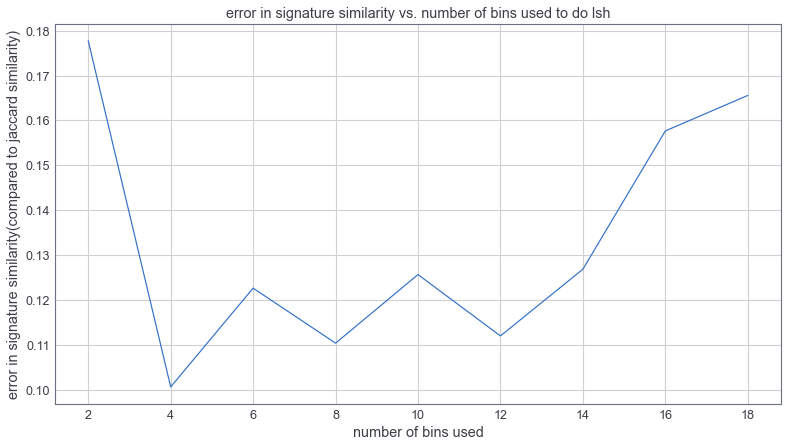

In [52]:
print("Figure 9: The relationship between error and number of bins \n")
plt.figure(figsize = (13,7))
plt.plot(bins, errors)
plt.title("error in signature similarity vs. number of bins used to do lsh")
plt.xlabel("number of bins used")
plt.ylabel("error in signature similarity(compared to jaccard similarity)")
print("The best bin is: " + str(bins[errors.index(min(errors))]))

### 4b. Analysis and answers to the questions

We implement the Min-wise LSH task on all data including botnet and benign cases after the discretization on dataset 10.

The implementation of Min-wise LSH task can be divided into the following steps. First, the minhash matrix is created where the rows represent the pairs of source and destination addresses and the columns are the 3-gram-permutations of features. The feature is a combination of protocol and duration after the first discretization task. The cell value is set to 1 if the 3-gram exists once in the stream data of the ip-addresses pairs. Second, we transpose the minhash matrix for further hash signature. Third, we design a function to calculate the jaccard distance. We run the jaccard distance calculation for minhash matrix to prepare for the comparison. Fourth, we set different bins to obtain hash signature from 2 to 20 with a stepsize of 2. In this step, we also get the jaccard distance and computation time for each bin. Last, we compare the runtime and estimate error for the LSH algorithm.

The time-comparison result shows that the hash signature generated by LSH algorithm improves the speed of calculate jaccard distance by approximately 2 times. This is a great performance increase, especially if you are dealing with much more data. 

The sub task error estimation plots the error rate compared with original minhash matrix with different numbers of bins(hash functions). Although the error rate varies a lot in each run, the average error rate is lower than 0.1, which proves the guarantee of precision of LSH algorithm. 

## 5. Random hyperplane locality sensitive hashing task – 1/2 A4 (Individual)

### 5a. Implementation - locality sensitive hashing

In [53]:
def aggregation():
    # group by pair of IP-addresses
    raw = list(source10[['SrcAddr', 'DstAddr', 'feature']].groupby(['SrcAddr', 'DstAddr']))
    # ip paris address list
    srcip_list = []
    dstip_list = []
    # feature list
    feature_list = []
    for i in range(len(raw)):
        srcip_list.append(raw[i][0][0])
        dstip_list.append(raw[i][0][1])
        feat_temp = raw[i][1].feature.values.astype(int).astype(str)
        string_temp = ''
        for j in range(len(feat_temp)):
            string_temp += feat_temp[j]
        feature_list.append(string_temp)
    
    return srcip_list, dstip_list, feature_list

alltrigram = []
for i in ['0', '1', '2']:
    for j in ['0', '1', '2']:
        for k in ['0', '1', '2']:
            alltrigram.append(i+j+k)
count_index = np.arange(0,len(alltrigram))
dict_index = dict(zip(alltrigram, count_index))

In [54]:
srcip_list, dstip_list, feature_list = aggregation()
rh_data = pd.DataFrame()
rh_data['Source'] = srcip_list
rh_data["Destination"] = dstip_list
rh_data["Feature"] = feature_list
rh_data['Count'] = [[0]*27 for _ in range(len(rh_data))]
rh_data

,Source,Destination,Feature,Count
0,147.32.1.20,147.32.85.20,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,147.32.1.20,147.32.85.7,00000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,147.32.1.20,147.32.85.8,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,147.32.1.20,147.32.86.135,00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,147.32.1.20,147.32.86.155,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
552,147.32.87.36,147.32.87.33,2222,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
553,147.32.87.36,66.249.66.211,210211111,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
554,147.32.87.36,66.249.72.152,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
555,147.32.87.36,66.249.72.228,221,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [55]:
# counting trigram
for i in range(len(rh_data)):
    temp_string = rh_data.Feature[i]
    if(len(temp_string) >=3 ):
        for j in range(len(temp_string)-2):
            rh_data['Count'][i][dict_index[temp_string[j:j+3]]] += 1
            
rh_data

,Source,Destination,Feature,Count
0,147.32.1.20,147.32.85.20,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,147.32.1.20,147.32.85.7,00000,"[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,147.32.1.20,147.32.85.8,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,147.32.1.20,147.32.86.135,00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,147.32.1.20,147.32.86.155,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
552,147.32.87.36,147.32.87.33,2222,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
553,147.32.87.36,66.249.66.211,210211111,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, ..."
554,147.32.87.36,66.249.72.152,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
555,147.32.87.36,66.249.72.228,221,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [56]:
# creating hyperplanes
n_hyperplanes = 3
output_size = 2 # 00 01 10 11

random_hyperplanes = []
for i in range(n_hyperplanes):
    hyperplane = np.random.randn(output_size, 27)
    random_hyperplanes.append(hyperplane)

In [57]:
# map to smaller size bins
rh_hash = []
for i in range(len(rh_data)):
    temp_hash = []
    for hyperplane in random_hyperplanes:
        temp_hash.append((np.dot(hyperplane,rh_data.Count[i]) > 1).dot([1,2]))
    rh_hash.append(temp_hash)

rh_data["Hash"] = rh_hash
rh_data

,Source,Destination,Feature,Count,Hash
0,147.32.1.20,147.32.85.20,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]"
1,147.32.1.20,147.32.85.7,00000,"[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]"
2,147.32.1.20,147.32.85.8,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]"
3,147.32.1.20,147.32.86.135,00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]"
4,147.32.1.20,147.32.86.155,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]"
...,...,...,...,...,...
552,147.32.87.36,147.32.87.33,2222,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 3]"
553,147.32.87.36,66.249.66.211,210211111,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, ...","[3, 0, 1]"
554,147.32.87.36,66.249.72.152,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]"
555,147.32.87.36,66.249.72.228,221,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 3, 0]"


#### Run-time Comparison

In [58]:
import time

In [59]:
print('Original Run-time:')
start = time.time()
allDistance = np.zeros([len(rh_data), len(rh_data)])
for i in range(len(rh_data)):
    for j in range(i+1, len(rh_data)):
        distance = np.linalg.norm(np.array(rh_data.Count[i])-np.array(rh_data.Count[j]), ord=2)
        allDistance[i][j] = allDistance[j][i] = distance
end = time.time()
print('\tTotal time:', end-start)

print()

print('N-gram Smaller Space Run-time:')
strat = time.time()
allDistance = np.zeros([len(rh_data), len(rh_data)])
rh_hash = []
for i in range(len(rh_data)):
    temp_hash = []
    for hyperplane in random_hyperplanes:
        temp_hash.append((np.dot(hyperplane,rh_data.Count[i]) > 1).dot([1,2]))
    rh_hash.append(temp_hash)
end = time.time()
t1 = end-start
print('\tTime for mapping:', t1)
start = time.time()
for i in range(len(rh_hash)):
    for j in range(i+1, len(rh_hash)):
        distance = np.linalg.norm(np.array(rh_hash[i])-np.array(rh_hash[j]), ord=2)
        allDistance[i][j] = allDistance[j][i] = distance
end = time.time()
t2 = end-start
print('\tTime for distance calculation:', t2)
print('\tTotal time:', t1+t2)

Original Run-time:
	Total time: 7.6100263595581055

N-gram Smaller Space Run-time:
	Time for mapping: 7.657006740570068
	Time for distance calculation: 1.3830108642578125
	Total time: 9.04001760482788


In [60]:
label = []
for i in range(len(rh_data)):
    label.append(rh_data['Source'][i] in Botnet)
rh_data["Label"] = label
rh_data

,Source,Destination,Feature,Count,Hash,Label
0,147.32.1.20,147.32.85.20,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]",False
1,147.32.1.20,147.32.85.7,00000,"[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]",False
2,147.32.1.20,147.32.85.8,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]",False
3,147.32.1.20,147.32.86.135,00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]",False
4,147.32.1.20,147.32.86.155,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]",False
...,...,...,...,...,...,...
552,147.32.87.36,147.32.87.33,2222,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 3]",False
553,147.32.87.36,66.249.66.211,210211111,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, ...","[3, 0, 1]",False
554,147.32.87.36,66.249.72.152,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0]",False
555,147.32.87.36,66.249.72.228,221,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 3, 0]",False


In [61]:
print('Botnet Hashing Result:')
eval_botnet = np.unique(rh_data.loc[rh_data['Label']==True, ['Hash']], return_counts=True)
print("- Hash:\n", eval_botnet[0])
print("- Count:\n", eval_botnet[1])
print()
print('- Benign Hashing Result:')
eval_benign = np.unique(rh_data.loc[rh_data['Label']!=True, ['Hash']], return_counts=True)
print("- Hash:\n", eval_benign[0])
print("- Count:\n", eval_benign[1])

Botnet Hashing Result:
- Hash:
 [list([0, 0, 0]) list([0, 0, 1]) list([0, 2, 0]) list([2, 0, 1])]
- Count:
 [72 10 11 10]

- Benign Hashing Result:
- Hash:
 [list([0, 0, 0]) list([0, 0, 1]) list([0, 2, 0]) list([0, 2, 1])
 list([0, 2, 3]) list([0, 3, 0]) list([1, 0, 0]) list([1, 0, 3])
 list([2, 0, 0]) list([2, 0, 1]) list([2, 2, 1]) list([3, 0, 0])
 list([3, 0, 1]) list([3, 2, 1])]
- Count:
 [206  19  37   1 145   5   2   1   3  28   1   1   4   1]


### 5b. Analysis and answers to the questions. Also provide relevant plots.

## 6.Botnet profiling task – 1/2 A4

In [62]:
def discretization(df: pd.DataFrame, quantile=10, plot=False, sel=10):
    df = df[~df.Label.str.contains("Background")]

    if sel in [9, 10]:
        Botnet = [
            "147.32.84.165", "147.32.84.191", "147.32.84.192", "147.32.84.193",
            "147.32.84.204", "147.32.84.205", "147.32.84.206", "147.32.84.207",
            "147.32.84.208", "147.32.84.209"
        ]
    elif sel in [11, 12]:
        Botnet = ['147.32.84.165', '147.32.84.191', '147.32.84.192']
    df['Botnet'] = df['SrcAddr'].isin(Botnet)

    protocol_encoder = {'arp': 0, 'udp': 1, 'tcp': 2, 'icmp': 3, 'rtp': 4}
    df["Proto"].replace('arp', protocol_encoder['arp'], inplace=True)
    df["Proto"].replace('udp', protocol_encoder['udp'], inplace=True)
    df["Proto"].replace('tcp', protocol_encoder['tcp'], inplace=True)
    df["Proto"].replace('icmp', protocol_encoder['icmp'], inplace=True)
    df["Proto"].replace('rtp', protocol_encoder['rtp'], inplace=True)

    features = df[['Dur', 'Proto']]
    features_norm = Normalizer().fit_transform(features)
    pca = PCA(n_components=1)
    feature_comb = pca.fit_transform(features_norm,
                                     y=df['Botnet'].values).reshape(-1, 1)

    spearman = []
    for i in range(2, 50):
        KBins = KBinsDiscretizer(n_bins=i,
                                 encode='ordinal',
                                 strategy='quantile')
        feature_disc = KBins.fit_transform(feature_comb)
        spearman.append(spearmanr(feature_disc, feature_comb)[0])
    plt.figure(figsize=(15, 5))
    plt.plot(np.arange(2, 50), spearman)
    plt.xticks(np.arange(2, 50))
    plt.xlabel("number of bins")
    plt.ylabel("spearman relation")
    plt.show()

    feature_disc = KBinsDiscretizer(
        n_bins=quantile, encode='ordinal',
        strategy='quantile').fit_transform(feature_comb)
    df['feature'] = feature_disc

    if (plot):
        df_botnet = df[df['Botnet'] == 1]
        df_benign = df[df['Botnet'] != 1]

        botnet_result = np.unique(df_botnet.feature.values, return_counts=True)
        benign_result = np.unique(df_benign.feature.values, return_counts=True)

        plt.figure(figsize=(15, 5))
        plt.subplot(121)
        plt.bar(botnet_result[0], botnet_result[1])
        plt.xticks(botnet_result[0])
        plt.xlabel("bin")
        plt.ylabel("count")
        plt.title("botnet")
        plt.subplot(122)
        plt.bar(benign_result[0], benign_result[1])
        plt.xticks(benign_result[0])
        plt.xlabel("bin")
        plt.ylabel("count")
        plt.title("benign")
        plt.show()

    return df


def aggregation(df: pd.DataFrame):
    # group by source address
    raw = list(df[['SrcAddr', 'feature', 'Botnet']].groupby(['SrcAddr']))
    srcip_list = []  # source list
    feature_list = []  # feature list
    label_list = []  # label list
    for i in range(len(raw)):
        srcip_list.append(raw[i][0])
        label_list.append(raw[i][1].Botnet.values[0])
        feat_temp = raw[i][1].feature.values.astype(int).astype(str)
        string_temp = ''
        for j in range(len(feat_temp)):
            string_temp += feat_temp[j]
        feature_list.append(string_temp)

    new_df = pd.DataFrame()
    new_df["Source"] = srcip_list
    new_df["Feature"] = feature_list
    new_df["Count"] = [[0] * 27 for _ in range(len(new_df))]
    new_df["Label"] = label_list

    return new_df


alltrigram = []
for i in ['0', '1', '2']:
    for j in ['0', '1', '2']:
        for k in ['0', '1', '2']:
            alltrigram.append(i + j + k)
count_index = np.arange(0, len(alltrigram))
dict_index = dict(zip(alltrigram, count_index))


def count_gram(df: pd.DataFrame):
    # counting trigram
    for i in range(len(df)):
        temp_string = df.Feature[i]
        if (len(temp_string) >= 3):
            for j in range(len(temp_string) - 2):
                df['Count'][i][dict_index[temp_string[j:j + 3]]] += 1


def cosine_dist(df: pd.DataFrame, selected_botnet: str):
    sel_botnet_count = df.loc[df['Source'] == selected_botnet,
                              ['Count']].values[0, 0]
    distance_list = []
    for i in range(len(df)):
        temp_count = df.iloc[i, 2]
        distance_list.append(cosine_distances([sel_botnet_count],
                                              [temp_count])[0,0])

    return distance_list

def botnet_pred(df: pd.DataFrame):
    threshold = df.Distance.mean()
    prediction_list = []
    for i in range(len(df)):
        if(df.Distance[i] > 0.5):
            prediction_list.append(False)
        else:
            prediction_list.append(True)
    
    return prediction_list

### 6a. Learn a sequential model

In [63]:
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import confusion_matrix
import seaborn as sns

#### Load Dataset & Data Preprocessing

Figure 10: The relationship between number of bins and spearmanr in each scenario

CTU-13 scenarios 9


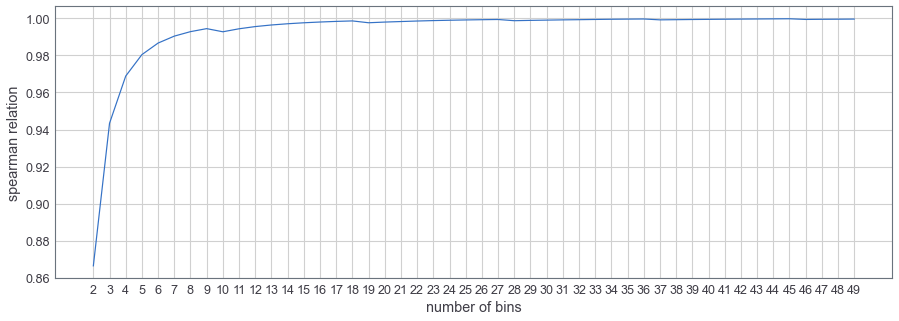

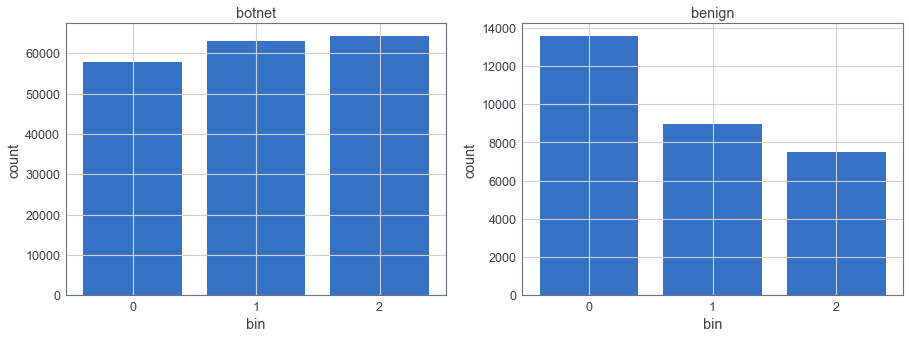

CTU-13 scenarios 10


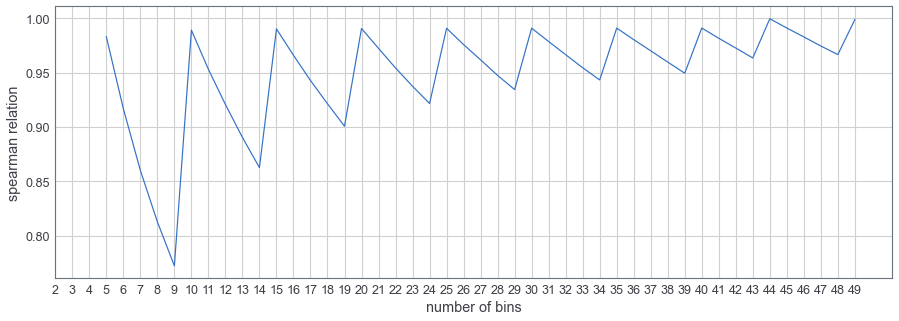

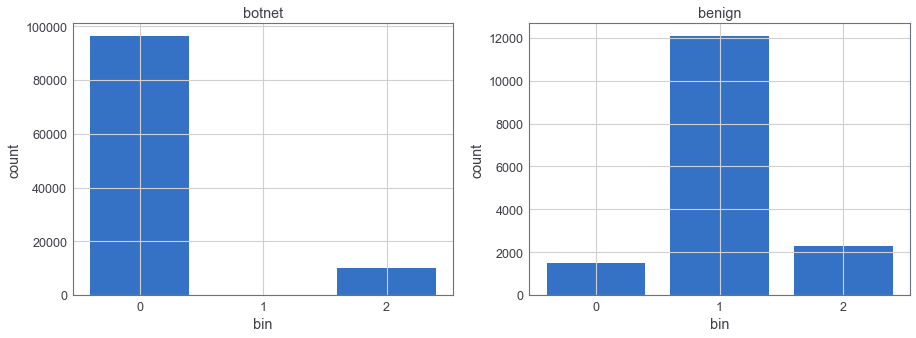

CTU-13 scenarios 11


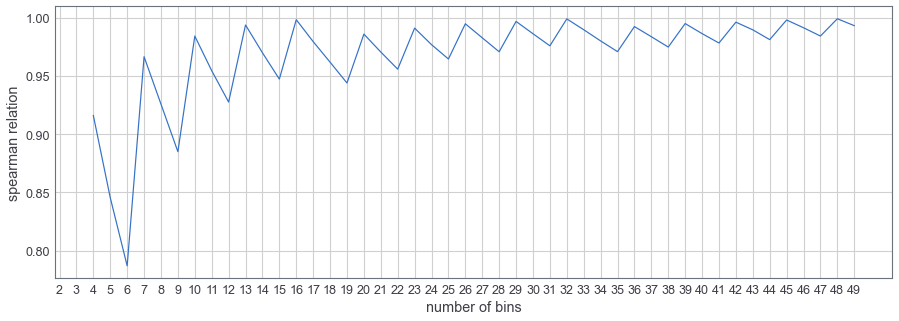

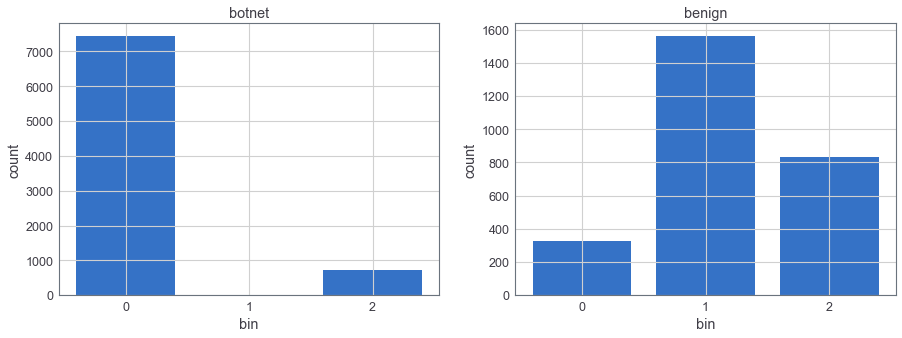

CTU-13 scenarios 12


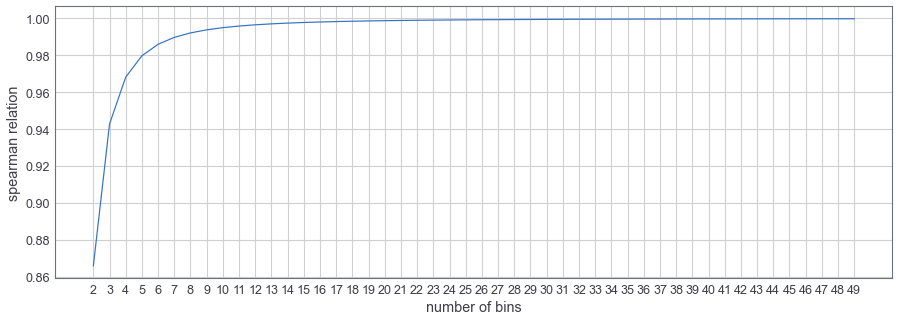

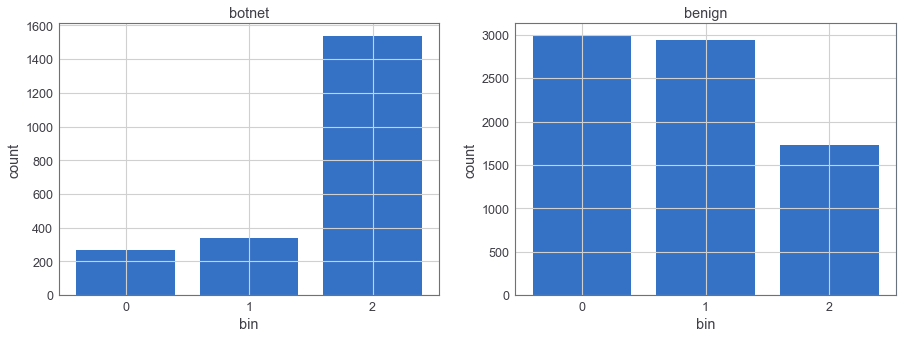

In [64]:
# load data
raw_source9 = pd.read_csv('./dataset/dataset_9/capture20110817.binetflow')
raw_source10 = pd.read_csv('./dataset/dataset_10/capture20110818.binetflow')
raw_source11 = pd.read_csv('./dataset/dataset_11/capture20110818-2.binetflow')
raw_source12 = pd.read_csv('./dataset/dataset_12/capture20110819.binetflow')

# preprocessing
print("Figure 10: The relationship between number of bins and spearmanr in each scenario\n")
print("CTU-13 scenarios 9")
source9 = discretization(raw_source9, quantile=3, plot=True, sel=9)
print("CTU-13 scenarios 10")
source10 = discretization(raw_source10, quantile=10, plot=True, sel=10)
print("CTU-13 scenarios 11")
source11 = discretization(raw_source11, quantile=7, plot=True, sel=11)
print("CTU-13 scenarios 12")
source12 = discretization(raw_source12, quantile=3, plot=True, sel=12)

In [65]:
# Extract features, source IPs and label
new_source9 = aggregation(source9)
new_source10 = aggregation(source10)
new_source11 = aggregation(source11)
new_source12 = aggregation(source12)

In [66]:
# counting
count_gram(new_source9)
count_gram(new_source10)
count_gram(new_source11)
count_gram(new_source12)

#### Prediction
selected_infected_host = '147.32.84.165'

In [67]:
# using cosine distance
new_source9["Distance"] = cosine_dist(new_source9, '147.32.84.165')
new_source10["Distance"] = cosine_dist(new_source10, '147.32.84.165')
new_source11["Distance"] = cosine_dist(new_source11, '147.32.84.165')
new_source12["Distance"] = cosine_dist(new_source12, '147.32.84.165')

In [68]:
# threshold = the mean of the distance
# we expect that the IPs with a distance larger than the mean is the benign ones
# and the IPs with distance less than the mean is the infected ones/botnets
new_source9["Prediction"] = botnet_pred(new_source9)
new_source10["Prediction"] = botnet_pred(new_source10)
new_source11["Prediction"] = botnet_pred(new_source11)
new_source12["Prediction"] = botnet_pred(new_source12)

#### Evaluation

Figure 11: The confusion matrix of predicted result
Scenario 9


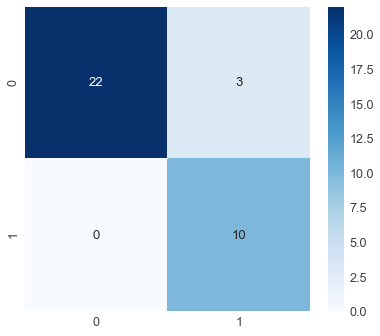

In [69]:
print("Figure 11: The confusion matrix of predicted result")
print("Scenario 9")
result9 = confusion_matrix(new_source9.Label.values, new_source9.Prediction.values)
sns.heatmap(result9, annot=True, cmap='Blues')
plt.show()

Figure 12: The confusion matrix of predicted result
Scenario 10


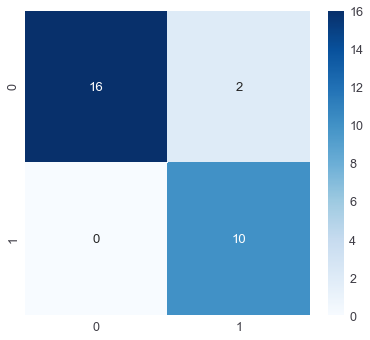

In [70]:
print("Figure 12: The confusion matrix of predicted result")
print("Scenario 10")
result10 = confusion_matrix(new_source10.Label.values, new_source10.Prediction.values)
sns.heatmap(result10, annot=True, cmap='Blues')
plt.show()

Figure 13: The confusion matrix of predicted result
Scenario 11


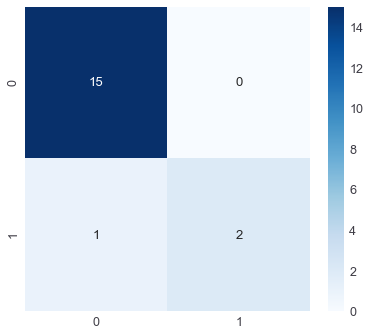

In [71]:
print("Figure 13: The confusion matrix of predicted result")
print("Scenario 11")
result11 = confusion_matrix(new_source11.Label.values, new_source11.Prediction.values)
sns.heatmap(result11, annot=True, cmap='Blues')
plt.show()

Figure 14: The confusion matrix of predicted result
Scenario 12


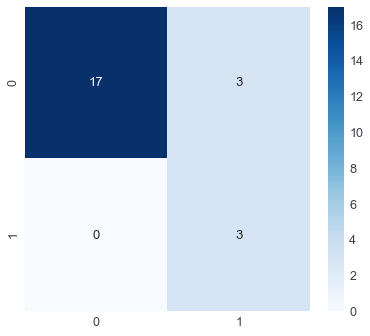

In [72]:
print("Figure 14: The confusion matrix of predicted result")
print("Scenario 12")
result12 = confusion_matrix(new_source12.Label.values, new_source12.Prediction.values)
sns.heatmap(result12, annot=True, cmap='Blues')
plt.show()

### 6b. Analysis and answers to the questions.

## 7.Botnet fingerprinting task – 1/2 A4

### 7a. Fingerprinting


#### Functions for processing

In [73]:
# Function to discretize data
def discretization(df: pd.DataFrame, quantile=10, plot=False, sel=10):
    df = df[~df.Label.str.contains("Background")]

    if sel in [9, 10]:
        Botnet = [
            "147.32.84.165", "147.32.84.191", "147.32.84.192", "147.32.84.193",
            "147.32.84.204", "147.32.84.205", "147.32.84.206", "147.32.84.207",
            "147.32.84.208", "147.32.84.209"
        ]
    elif sel in [11, 12]:
        Botnet = ['147.32.84.165', '147.32.84.191', '147.32.84.192']
    df['Botnet'] = df['SrcAddr'].isin(Botnet)

    protocol_encoder = {'arp': 0, 'udp': 1, 'tcp': 2, 'icmp': 3, 'rtp': 4}
    df["Proto"].replace('arp', protocol_encoder['arp'], inplace=True)
    df["Proto"].replace('udp', protocol_encoder['udp'], inplace=True)
    df["Proto"].replace('tcp', protocol_encoder['tcp'], inplace=True)
    df["Proto"].replace('icmp', protocol_encoder['icmp'], inplace=True)
    df["Proto"].replace('rtp', protocol_encoder['rtp'], inplace=True)

    features = df[['Dur', 'Proto']]
    features_norm = Normalizer().fit_transform(features)
    pca = PCA(n_components=1)
    feature_comb = pca.fit_transform(features_norm,
                                     y=df['Botnet'].values).reshape(-1, 1)

    spearman = []
    for i in range(2, 50):
        KBins = KBinsDiscretizer(n_bins=i,
                                 encode='ordinal',
                                 strategy='quantile')
        feature_disc = KBins.fit_transform(feature_comb)
        spearman.append(spearmanr(feature_disc, feature_comb)[0])
    plt.figure(figsize=(15, 5))
    plt.plot(np.arange(2, 50), spearman)
    plt.xticks(np.arange(2, 50))
    plt.xlabel("number of bins")
    plt.ylabel("spearman relation")
    plt.show()

    feature_disc = KBinsDiscretizer(
        n_bins=quantile, encode='ordinal',
        strategy='quantile').fit_transform(feature_comb)
    df['feature'] = feature_disc

    if (plot):
        df_botnet = df[df['Botnet'] == 1]
        df_benign = df[df['Botnet'] != 1]

        botnet_result = np.unique(df_botnet.feature.values, return_counts=True)
        benign_result = np.unique(df_benign.feature.values, return_counts=True)

        plt.figure(figsize=(15, 5))
        plt.subplot(121)
        plt.bar(botnet_result[0], botnet_result[1])
        plt.xticks(botnet_result[0])
        plt.xlabel("bin")
        plt.ylabel("count")
        plt.title("botnet")
        plt.subplot(122)
        plt.bar(benign_result[0], benign_result[1])
        plt.xticks(benign_result[0])
        plt.xlabel("bin")
        plt.ylabel("count")
        plt.title("benign")
        plt.show()

    return df


In [74]:
# Function to extract related columns
def aggregation(df: pd.DataFrame):
    # group by source address
    raw = list(df[['SrcAddr', 'feature', 'Botnet']].groupby(['SrcAddr']))
    srcip_list = []  # source list
    feature_list = []  # feature list
    label_list = []  # label list
    for i in range(len(raw)):
        srcip_list.append(raw[i][0])
        label_list.append(raw[i][1].Botnet.values[0])
        feat_temp = raw[i][1].feature.values.astype(int).astype(str)
        string_temp = ''
        for j in range(len(feat_temp)):
            string_temp += feat_temp[j]
        feature_list.append(string_temp)

    new_df = pd.DataFrame()
    new_df["Source"] = srcip_list
    new_df["Feature"] = feature_list
    new_df["Count"] = [[0] * 27 for _ in range(len(new_df))]
    new_df["Label"] = label_list

    return new_df

In [75]:
# get all permutations
alltrigram = []
for i in ['0', '1', '2']:
    for j in ['0', '1', '2']:
        for k in ['0', '1', '2']:
            alltrigram.append(i + j + k)
count_index = np.arange(0, len(alltrigram))
dict_index = dict(zip(alltrigram, count_index))

In [76]:
# Function to count each 3-gram amount
def count_gram(df: pd.DataFrame):
    # counting trigram
    for i in range(len(df)):
        temp_string = df.Feature[i]
        if (len(temp_string) >= 3):
            for j in range(len(temp_string) - 2):
                df['Count'][i][dict_index[temp_string[j:j + 3]]] += 1

In [77]:
# Function to count feature
def count_feature(df: pd.DataFrame):
    # counting trigram
    result = np.zeros(27,int)
    for i in range(len(df)): # each source in df
        temp_string = df.Count[i] # the permutation
        for j in range(len(temp_string)): # the count in each source
            if (len(df.Feature[i])-2) >= 1:
                freq = float(int(df.Count[i][j])/(len(df.Feature[i])-2))
                if( freq >=(1/27)):
                    result[j] += 1
    return result

In [78]:
# Function to get predicted results
def pred_botnet(df: pd.DataFrame,benign_feature):
    # counting trigram
    result = np.zeros(len(df),int)
    for i in range(len(df)):
        temp_string = df.Count[i] # the permutation
        for j in range(len(temp_string)): # the count in each source
            if (df.Count[i][j] >=1) and (benign_feature[j] == 0):
                result[i] = 1
    df['Pred'] = result
    return result

#### Load data

Figure 15: The relation between number of bins and spearmanr in each scenario
CTU-13 scenarios 9


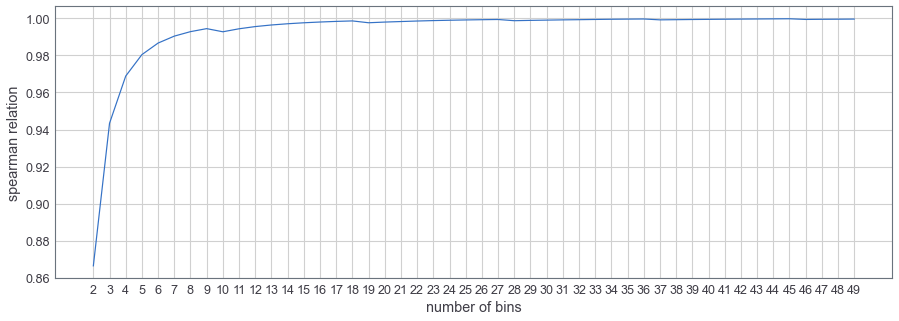

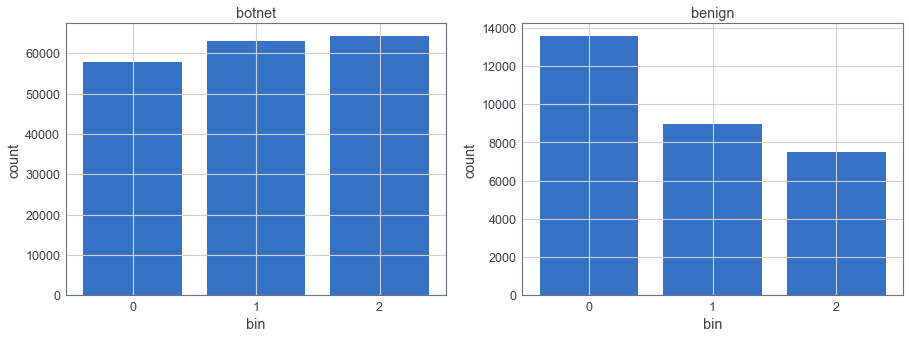

CTU-13 scenarios 10


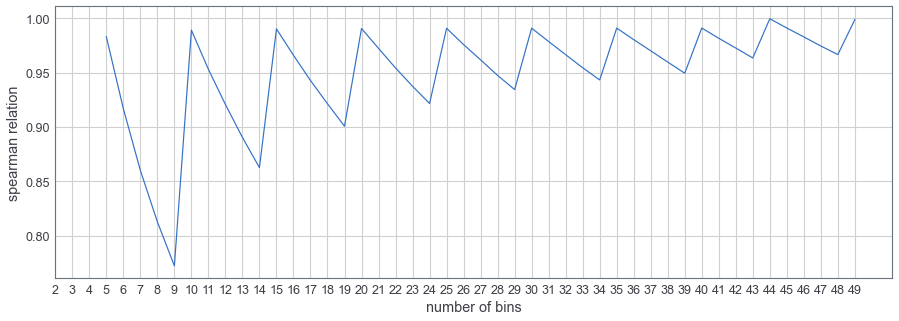

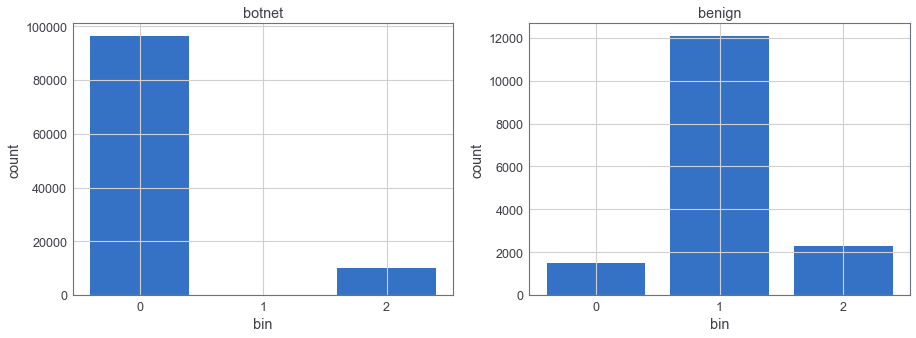

CTU-13 scenarios 11


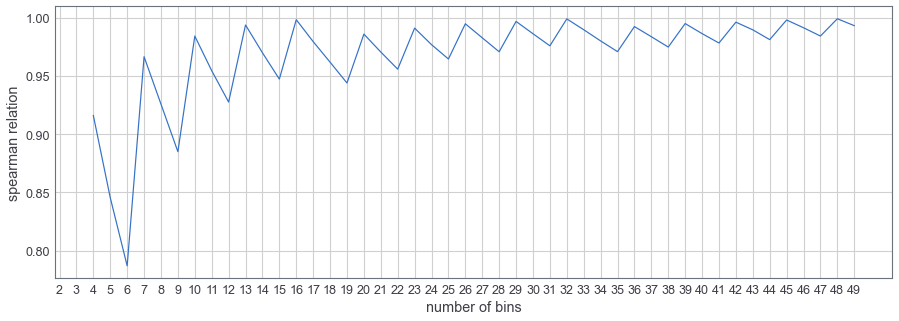

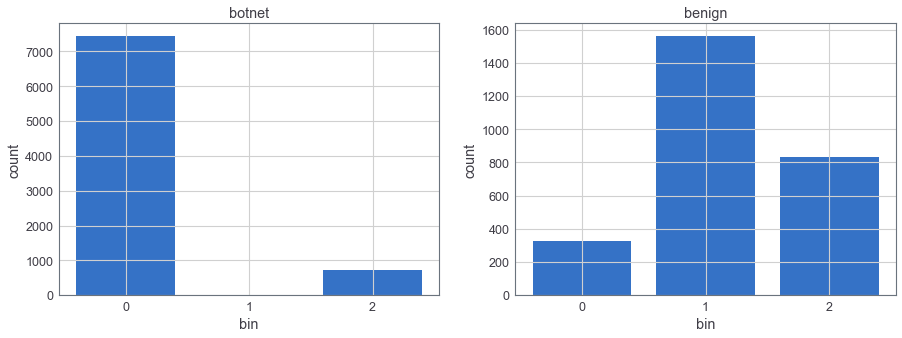

CTU-13 scenarios 12


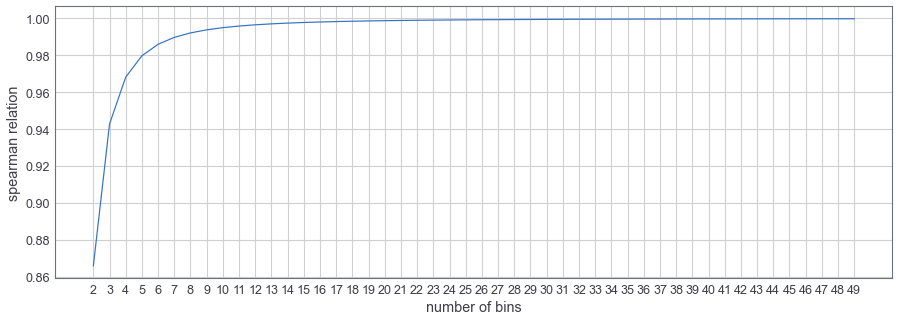

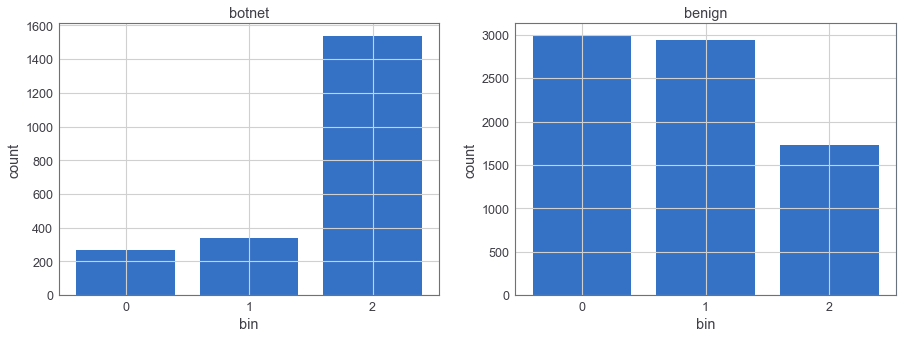

In [79]:
# load data
raw_source9 = pd.read_csv('./dataset/dataset_9/capture20110817.binetflow')
raw_source10 = pd.read_csv('./dataset/dataset_10/capture20110818.binetflow')
raw_source11 = pd.read_csv('./dataset/dataset_11/capture20110818-2.binetflow')
raw_source12 = pd.read_csv('./dataset/dataset_12/capture20110819.binetflow')

# preprocessing
print("Figure 15: The relation between number of bins and spearmanr in each scenario")
print("CTU-13 scenarios 9")
source9 = discretization(raw_source9, quantile=3, plot=True, sel=9)
print("CTU-13 scenarios 10")
source10 = discretization(raw_source10, quantile=10, plot=True, sel=10)
print("CTU-13 scenarios 11")
source11 = discretization(raw_source11, quantile=7, plot=True, sel=11)
print("CTU-13 scenarios 12")
source12 = discretization(raw_source12, quantile=3, plot=True, sel=12)

#### Process Data

In [80]:
# For dataset 9
benign_source9 = source9[source9['Botnet'] != 1]
botnet_source9 = source9[source9['Botnet'] == 1]
new_benign_source9 = aggregation(benign_source9)
new_botnet_source9 = aggregation(botnet_source9)
new_all_source9 = aggregation(source9)

# For dataset 10
benign_source10 = source10[source10['Botnet'] != 1]
botnet_source10 = source10[source10['Botnet'] == 1]
new_benign_source10 = aggregation(benign_source10)
new_botnet_source10 = aggregation(botnet_source10)
new_all_source10 = aggregation(source10)

#For dataset 11
benign_source11 = source11[source11['Botnet'] != 1]
botnet_source11 = source11[source11['Botnet'] == 1]
new_benign_source11 = aggregation(benign_source11)
new_botnet_source11 = aggregation(botnet_source11)
new_all_source11 = aggregation(source11)

# For dataset12
benign_source12 = source12[source12['Botnet'] != 1]
botnet_source12 = source12[source12['Botnet'] == 1]
new_benign_source12 = aggregation(benign_source12)
new_botnet_source12 = aggregation(botnet_source12)
new_all_source12 = aggregation(source12)

#### Count for each gram

In [81]:
# Count 3-gram for benign data
count_gram(new_benign_source9)
count_gram(new_benign_source10)
count_gram(new_benign_source11)
count_gram(new_benign_source12)

In [82]:
# Count 3-gram for all data
count_gram(new_all_source9)
count_gram(new_all_source10)
count_gram(new_all_source11)
count_gram(new_all_source12)

#### Get results for benign features

In [83]:
# get the list of occured 3-gram features to serve as fingerprint
benign_feature9 = count_feature(new_benign_source9)
benign_feature10 = count_feature(new_benign_source10)
benign_feature11 = count_feature(new_benign_source11)
benign_feature12 = count_feature(new_benign_source12)

#### Predict for all source based on benign features

In [84]:
# use the fingerprint to predict for all cases - including benign and botnet
pred_botnet(new_all_source9,benign_feature9)
pred_botnet(new_all_source10,benign_feature10)
pred_botnet(new_all_source11,benign_feature11)
pred_botnet(new_all_source12,benign_feature12)

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0])

#### Print confusion matrix for predicted results

Figure 16: Confusion matrix of Fingerprinting result
new_source9


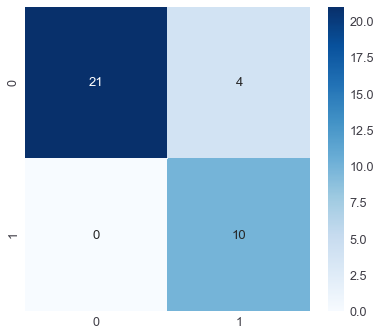

In [85]:
print("Figure 16: Confusion matrix of Fingerprinting result")
print("new_source9")
result9 = confusion_matrix(new_all_source9.Label.values, new_all_source9.Pred.values)
sns.heatmap(result9, annot=True, cmap='Blues')
plt.show()

Figure 17: Confusion matrix of Fingerprinting result
new_source10


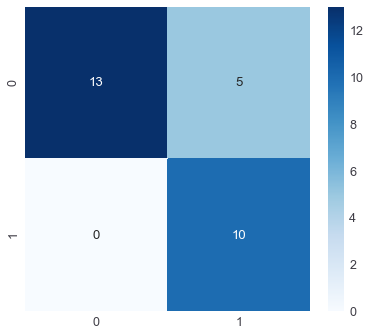

In [86]:
print("Figure 17: Confusion matrix of Fingerprinting result")
print("new_source10")
result10 = confusion_matrix(new_all_source10.Label.values, new_all_source10.Pred.values)
sns.heatmap(result10, annot=True, cmap='Blues')
plt.show()

Figure 18: Confusion matrix of Fingerprinting result
new_source11


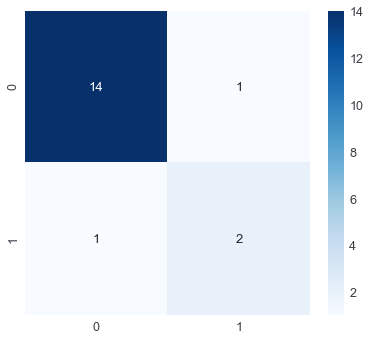

In [87]:
print("Figure 18: Confusion matrix of Fingerprinting result")
print("new_source11")
result11 = confusion_matrix(new_all_source11.Label.values, new_all_source11.Pred.values)
sns.heatmap(result11, annot=True, cmap='Blues')
plt.show()

Figure 19: Confusion matrix of Fingerprinting result
new_source12


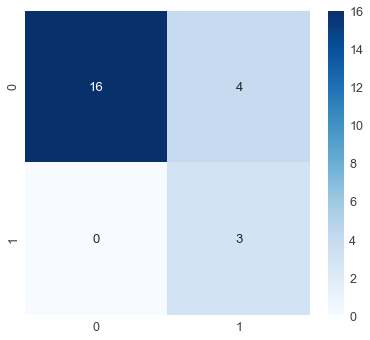

In [88]:
print("Figure 19: Confusion matrix of Fingerprinting result")
print("new_source12")
result12 = confusion_matrix(new_all_source12.Label.values, new_all_source12.Pred.values)
sns.heatmap(result12, annot=True, cmap='Blues')
plt.show()

### 7b. Analysis and answers to the questions.

The fingerprinting task relies on the fact that some 3-grams do not occur for benign hosts and do occur for infected hosts the rather than the distances between a selected host and other hosts in the profiling task to distinguish the hosts. 

First, we discretize all four datasets and then extract the benign ones. 

Second, we do the 3-gram counting to the benign data set and all data set. This step could gather how many times one feature appearing in the data set. The former serves as the train set to find and store the occurred 3-gram features. The latter contains both infected and non-infected data that is used to be compared with the predicted result. In this step, we modify the method to define the occurred and un-occurred features with a probability of 1/27. In other words, if a 3-gram feature appears more than 1/27 of the length of the feature list, we identify it as occurred.

Third, the occurred featured found in step2 is applied in the 3-gram discretized all-data set to predict whether the host with different features is infected or not. The predicted result is appended in the column 'Pred' of the data frame. 

Last, by comparing the 'Label' and 'Pred' columns, we get the four confusion matrixes above. 

## 8. Bonus Task 1/2 A4

### 8a. Provide implementation and analysis.

In [89]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [90]:
# implement smote to resample the data set
def smote(X,y):
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X, y)
    return X_res, y_res
# the list of infected hosts
Botnet = [
    "147.32.84.165", "147.32.84.191", "147.32.84.192", "147.32.84.193",
    "147.32.84.204", "147.32.84.205", "147.32.84.206", "147.32.84.207",
    "147.32.84.208", "147.32.84.209"
]

#### 8a. Provide implementation and analysis.

In [91]:
# load data
raw_source9 = pd.read_csv('./dataset/dataset_9/capture20110817.binetflow')
raw_source10 = pd.read_csv('./dataset/dataset_10/capture20110818.binetflow')
raw_source11 = pd.read_csv('./dataset/dataset_11/capture20110818-2.binetflow')
raw_source12 = pd.read_csv('./dataset/dataset_12/capture20110819.binetflow')

source_list = [raw_source9, raw_source10, raw_source11, raw_source12]

encoder_list = []
# preprocessing: pruning, Labelling, fillna, encoding
for i in tqdm(range(len(source_list))):
    if (i > 1):
        Botnet = ['147.32.84.165', '147.32.84.191', '147.32.84.192']
    # encode each feature
    enc = OrdinalEncoder()
    source_list[i] = source_list[i][~(source_list[i]).Label.str.contains("Background")] # background flows removed
    source_list[i].drop(columns = ["StartTime"], inplace=True) # drop timestamp
    source_list[i]["Botnet"] = source_list[i]['SrcAddr'].isin(Botnet) # tag
    source_list[i].drop(columns = ['SrcAddr'], inplace=True) # drop cheat feature
    for col in source_list[i].columns: # fill NAN
        if(type(source_list[i][col].values[0]) == str):
            source_list[i][col].fillna(value="unknown", inplace=True)
        else:
            source_list[i][col].fillna(value=source_list[i][col].mean(), inplace=True)
    source_list[i] = enc.fit_transform(source_list[i])
    encoder_list.append(enc)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.29it/s]


In [92]:
X = []
y = []
for i in range(len(source_list)):
    X.append(source_list[i][:, :-1])
    y.append(source_list[i][:, -1])

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:37<00:00,  9.35s/it]

Figure 20: Confusion matrix of Random Forest Classifier result


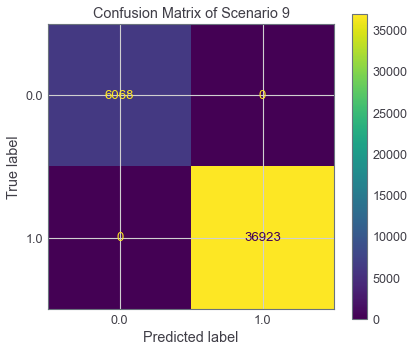

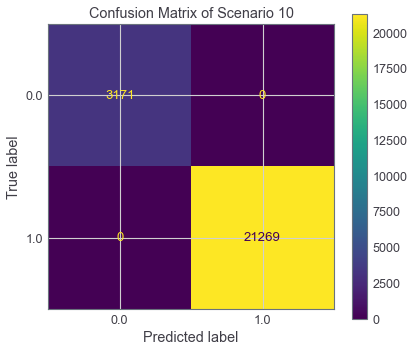

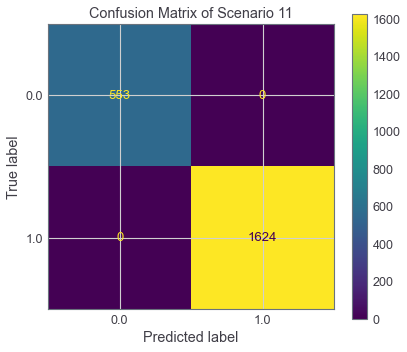

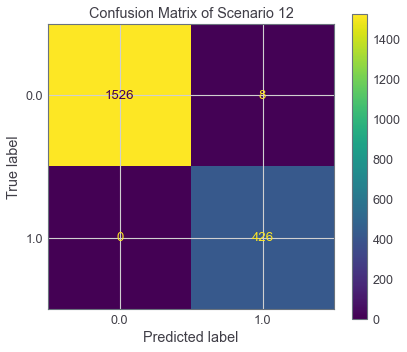

In [93]:
# use trainset to fit the classifier
rf = RandomForestClassifier(n_estimators=200, max_depth=3)
# plot the confusion matrix in each scenario
for i in tqdm(range(len(source_list))):
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X[i],
                                                        y[i],
                                                        test_size=0.2,
                                                        random_state=42)
    # smote
    X_train_smote, y_train_smote = smote(X_train, y_train)
    rf.fit(X_train_smote, y_train_smote)
    plot_confusion_matrix(rf, X_test, y_test)
    plt.title('Confusion Matrix of Scenario ' + str(9 + i))
print("Figure 20: Confusion matrix of Random Forest Classifier result")
plt.show()

#### Analysis